In [69]:
import os 
import shutil
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [70]:
%%time
df = pd.read_csv("C:/Users/bobbr/OneDrive/Documents/The Plan/NFL/2023/Modelling/qb_player_data_final.csv")
#df = df.copy()
df = df[df['GS'] == '*']
df = df.fillna(0)
df['FantasyPoints'] = -df['Fumbles FL']*1 - df['Passing Int']*2 + df['Passing TD']*4 + df['Passing Yds']*0.05 +df['Rushing Yds']*0.1 + df['Rushing TD']*6+df['Scoring 2PM']*2

CPU times: total: 27 s
Wall time: 33.7 s


In [71]:
df.head()

Unnamed: 0         player_wk_year    Rk    Year        Date    G#     Age  \
0           0   Brandon Allen 9 2019   9.0  2019.0  2019-11-03   9.0  27.059   
1           1  Brandon Allen 11 2019  10.0  2019.0  2019-11-17  10.0  27.073   
2           2  Brandon Allen 12 2019  11.0  2019.0  2019-11-24  11.0  27.080   
3           3  Brandon Allen 12 2020  17.0  2020.0  2020-11-29  11.0  28.085   
4           4  Brandon Allen 13 2020  18.0  2020.0  2020-12-06  12.0  28.092   

    Tm home_away   Result GS  Passing Cmp  Passing Att  Passing Cmp%  \
0  DEN         0  W 24-19  *         12.0         20.0         60.00   
1  DEN         @  L 23-27  *         17.0         39.0         43.59   
2  DEN         @   L 3-20  *         10.0         25.0         40.00   
3  CIN         0  L 17-19  *         17.0         29.0         58.62   
4  CIN         @   L 7-19  *         11.0         19.0         57.89   

   Passing Yds  Passing TD  Passing Int  Passing Rate  Passing Sk  \
0        193.0         2.0          0.0         125.6         3.0   
1        240.0         1.0          1.0          61.9         2.0   
2         82.0         0.0          1.0          32.4         4.0   
3        136.0         1.0          1.0          67.6         2.0   
4        153.0         1.0          1.0          79.5         5.0   

   Passing Yds.1  Passing Y/A  Passing AY/A  Rushing Att  Rushing Yds  \
0           18.0         9.65         11.65          5.0         13.0   
1            8.0         6.15          5.51          3.0         18.0   
2           33.0         3.28          1.48          2.0          8.0   
3           21.0         4.69          3.83          4.0          7.0   
4           30.0         8.05          6.74          2.0          3.0   

   Rushing Y/A  Rushing TD  Fumbles Fmb  Fumbles FL  Fumbles FF  Fumbles FR  \
0         2.60         0.0          0.0         0.0         0.0         0.0   
1         6.00         0.0          0.0         0.0         0.0         0.0   
2         4.00         0.0          0.0         0.0         0.0         0.0   
3         1.75         0.0          1.0         1.0         0.0         0.0   
4         1.50         0.0          0.0         0.0         0.0         0.0   

   Fumbles Yds  Fumbles TD  Off. Snaps Num Off. Snaps Pct  ST Snaps Num  \
0          0.0         0.0            48.0           100%           0.0   
1          0.0         0.0            79.0           100%           0.0   
2          0.0         0.0            49.0           100%           0.0   
3          0.0         0.0            49.0           100%           0.0   
4          0.0         0.0            44.0            85%           0.0   

  ST Snaps Pct        Player   Scoring 2PM  Scoring TD  Scoring Pts  \
0           0%  Brandon Allen          0.0         0.0          0.0   
1           0%  Brandon Allen          0.0         0.0          0.0   
2           0%  Brandon Allen          0.0         0.0          0.0   
3           0%  Brandon Allen          0.0         0.0          0.0   
4           0%  Brandon Allen          0.0         0.0          0.0   

   PuntingRetYds  PuntingNet  PuntingNY/P  PuntingTB PuntingTB%  PuntingIn20  \
0            0.0         0.0          0.0        0.0          0          0.0   
1            0.0         0.0          0.0        0.0          0          0.0   
2            0.0         0.0          0.0        0.0          0          0.0   
3            0.0         0.0          0.0        0.0          0          0.0   
4            0.0         0.0          0.0        0.0          0          0.0   

  PuntingIn20%  Unnamed: 64_level_0Status  Unnamed: 58_level_0Status  \
0            0                        0.0                        0.0   
1            0                        0.0                        0.0   
2            0                        0.0                        0.0   
3            0                        0.0                        0.0   
4            0                        0.0

<Axes: xlabel='FantasyPoints', ylabel='Density'>

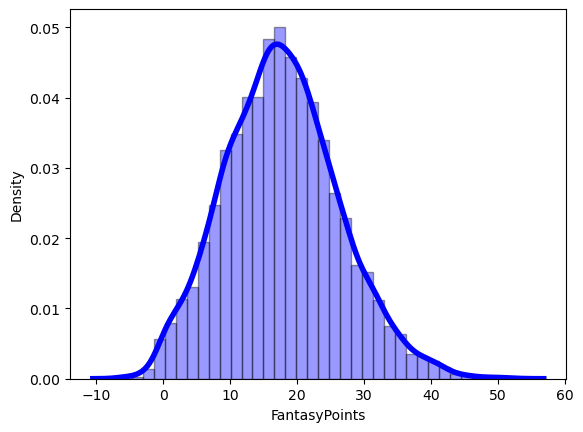

In [72]:

# matplotlib histogram
#plt.hist(df['FantasyPoints'], color = 'blue', edgecolor = 'black',
#         bins = int(180/5))

# seaborn histogram
sns.distplot(df['FantasyPoints'], hist=True, kde=True, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'},
            kde_kws = {'linewidth':4})
# Add labels
##plt.title('Histogram of Fantasy Points')
#plt.xlabel('FantasyPoints')
#plt.ylabel('Count')

In [73]:
df = df[df['FantasyPoints'] > 0]

In [74]:
#move this piece to the player data pull code
df = df.drop(columns = ['Unnamed: 0',
                        #'Unnamed: 0.1.1.1',

#'player_wk_year',
'Player ',
'Fumbles FF',
'Fumbles FL',
'Fumbles FR',
'Fumbles Fmb',
'Fumbles TD',
'Fumbles Yds',
'Off. Snaps Num',
'Off. Snaps Pct',
'Passing AY/A',
'Passing Att',
'Passing Cmp',
'Passing Cmp%',
'Passing Int',
'Passing Rate',
'Passing Sk',
'Passing TD',
'Passing Y/A',
'Passing Yds',
'Passing Yds.1',
'Rushing Att',
'Rushing TD',
'Rushing Y/A',
'Rushing Yds',
'ST Snaps Num',
'ST Snaps Pct',
'Scoring 2PM',
'Scoring Pts',
'Scoring TD',
'Rk',
'GS',
#'Year',
#'Status',
'Date',
'G#',
'Age',
'Tm',
'home_away',
'Result',
#                        'Unnamed: 0 1 wks ago',
#'Unnamed: 0.1 1 wks ago',

'Player  1 wks ago',

#'Status 1 wks ago',
'Date 1 wks ago',
'Week 1 wks ago',
'Tm 1 wks ago',
'home_away 1 wks ago',
'Opp 1 wks ago',
'Result 1 wks ago',
'player_wk_year 1 wks ago',
'Player  2 wks ago',
#'Status 2 wks ago',
'Date 2 wks ago',
'Week 2 wks ago',
#'Age 2 wks ago',
'Tm 2 wks ago',
'home_away 2 wks ago',
'Opp 2 wks ago',
'Result 2 wks ago',
'player_wk_year 2 wks ago',
#                        'Unnamed: 0 2 wks ago',
#'Unnamed: 0.1 2 wks ago',

'Player  3 wks ago',

#'Status 3 wks ago',
'Date 3 wks ago',
'Week 3 wks ago',
#'Age 3 wks ago',
'Tm 3 wks ago',
'home_away 3 wks ago',
'Opp 3 wks ago',
'Result 3 wks ago',
'player_wk_year 3 wks ago',
#                        'Unnamed: 0 3 wks ago',
#'Unnamed: 0.1 3 wks ago',

'Player  4 wks ago',
#'Status 4 wks ago',
'Date 4 wks ago',
'Week 4 wks ago',
#'Age 4 wks ago',
'Tm 4 wks ago',
'home_away 4 wks ago',
'Opp 4 wks ago',
'Result 4 wks ago',
'player_wk_year 4 wks ago',
#                        'Unnamed: 0 4 wks ago',
#'Unnamed: 0.1 4 wks ago',
#'Unnamed: 0 5 wks ago',
#'Unnamed: 0.1 5 wks ago',
#'Unnamed: 0 6 wks ago',
#'Unnamed: 0.1 6 wks ago',
#'Unnamed: 0 7 wks ago',
#'Unnamed: 0.1 7 wks ago',
#'Unnamed: 0 8 wks ago',
#'Unnamed: 0.1 8 wks ago',
#'Unnamed: 0 9 wks ago',
#'Unnamed: 0.1 9 wks ago',
#'Unnamed: 0 10 wks ago',
#'Unnamed: 0.1 10 wks ago',
#'Unnamed: 0 11 wks ago',
#'Unnamed: 0.1 11 wks ago',
#'Unnamed: 0 12 wks ago',
#'Unnamed: 0.1 12 wks ago',
#'Unnamed: 0 13 wks ago',
#'Unnamed: 0.1 13 wks ago',
#'Unnamed: 0 14 wks ago',
#'Unnamed: 0.1 14 wks ago',
#'Unnamed: 0 15 wks ago',
#'Unnamed: 0.1 15 wks ago',
#'Unnamed: 0 16 wks ago',
#'Unnamed: 0.1 16 wks ago',
#'Unnamed: 0 17 wks ago',
#'Unnamed: 0.1 17 wks ago',
#'Unnamed: 0 18 wks ago',
#'Unnamed: 0.1 18 wks ago',
#'Unnamed: 0 19 wks ago',
#'Unnamed: 0.1 19 wks ago',
#'Unnamed: 0 20 wks ago',
#'Unnamed: 0.1 20 wks ago',
#'Unnamed: 0 21 wks ago',
#'Unnamed: 0.1 21 wks ago',
#'Unnamed: 0 22 wks ago',
#'Unnamed: 0.1 22 wks ago',
#'Unnamed: 0 23 wks ago',
#'Unnamed: 0.1 23 wks ago',
#'Unnamed: 0 24 wks ago',
#'Unnamed: 0.1 24 wks ago',
#'Unnamed: 0 25 wks ago',
#'Unnamed: 0.1 25 wks ago',
#'Unnamed: 0 26 wks ago',
#'Unnamed: 0.1 26 wks ago',
#'Unnamed: 0 27 wks ago',
#'Unnamed: 0.1 27 wks ago',
#'Unnamed: 0 28 wks ago',
#'Unnamed: 0.1 28 wks ago',
#'Unnamed: 0 29 wks ago',
#'Unnamed: 0.1 29 wks ago',
#'Unnamed: 0 30 wks ago',
#'Unnamed: 0.1 30 wks ago',
#'Unnamed: 0 31 wks ago',
#'Unnamed: 0.1 31 wks ago',
#'Unnamed: 0 32 wks ago',
#'Unnamed: 0.1 32 wks ago',
#'Unnamed: 0 33 wks ago',
#'Unnamed: 0.1 33 wks ago',
#'Unnamed: 0 34 wks ago',
#'Unnamed: 0.1 34 wks ago',
#'Unnamed: 0 35 wks ago',
#'Unnamed: 0.1 35 wks ago',

'Player  5 wks ago',

#'Status 5 wks ago',
'Date 5 wks ago',
'Week 5 wks ago',
#'Age 5 wks ago',
'Tm 5 wks ago',
'home_away 5 wks ago',
'Opp 5 wks ago',
'Result 5 wks ago',
'player_wk_year 5 wks ago',
'Player  6 wks ago',
#'Status 6 wks ago',
'Date 6 wks ago',
'Week 6 wks ago',
#'Age 6 wks ago',
'Tm 6 wks ago',
'home_away 6 wks ago',
'Opp 6 wks ago',
'Result 6 wks ago',
'player_wk_year 6 wks ago',
'Player  7 wks ago',

#'Status 7 wks ago',
'Date 7 wks ago',
'Week 7 wks ago',
#'Age 7 wks ago',
'Tm 7 wks ago',
'home_away 7 wks ago',
'Opp 7 wks ago',
'Result 7 wks ago',
'player_wk_year 7 wks ago',
'Player  8 wks ago',

#'Status 8 wks ago',
'Date 8 wks ago',
'Week 8 wks ago',
#'Age 8 wks ago',
'Tm 8 wks ago',
'home_away 8 wks ago',
'Opp 8 wks ago',
'Result 8 wks ago',
'player_wk_year 8 wks ago',
'Player  9 wks ago',

#'Status 9 wks ago',
'Date 9 wks ago',
'Week 9 wks ago',
#'Age 9 wks ago',
'Tm 9 wks ago',
'home_away 9 wks ago',
'Opp 9 wks ago',
'Result 9 wks ago',
'player_wk_year 9 wks ago',
'Player  10 wks ago',

#'Status 10 wks ago',
'Date 10 wks ago',
'Week 10 wks ago',
#'Age 10 wks ago',
'Tm 10 wks ago',
'home_away 10 wks ago',
'Opp 10 wks ago',
'Result 10 wks ago',
'player_wk_year 10 wks ago',
'Player  11 wks ago',

#'Status 11 wks ago',
'Date 11 wks ago',
'Week 11 wks ago',
#'Age 11 wks ago',
'Tm 11 wks ago',
'home_away 11 wks ago',
'Opp 11 wks ago',
'Result 11 wks ago',
'player_wk_year 11 wks ago',
'Player  12 wks ago',

#'Status 12 wks ago',
'Date 12 wks ago',
'Week 12 wks ago',
#'Age 12 wks ago',
'Tm 12 wks ago',
'home_away 12 wks ago',
'Opp 12 wks ago',
'Result 12 wks ago',
'player_wk_year 12 wks ago',
'Player  13 wks ago',

#'Status 13 wks ago',
'Date 13 wks ago',
'Week 13 wks ago',
#'Age 13 wks ago',
'Tm 13 wks ago',
'home_away 13 wks ago',
'Opp 13 wks ago',
'Result 13 wks ago',
'player_wk_year 13 wks ago',
'Player  14 wks ago',

#'Status 14 wks ago',
'Date 14 wks ago',
'Week 14 wks ago',
#'Age 14 wks ago',
'Tm 14 wks ago',
'home_away 14 wks ago',
'Opp 14 wks ago',
'Result 14 wks ago',
'player_wk_year 14 wks ago',
'Player  15 wks ago',

#'Status 15 wks ago',
'Date 15 wks ago',
'Week 15 wks ago',
#'Age 15 wks ago',
'Tm 15 wks ago',
'home_away 15 wks ago',
'Opp 15 wks ago',
'Result 15 wks ago',
'player_wk_year 15 wks ago',
'Player  16 wks ago',
#'Status 16 wks ago',
'Date 16 wks ago',
'Week 16 wks ago',
#'Age 16 wks ago',
'Tm 16 wks ago',
'home_away 16 wks ago',
'Opp 16 wks ago',
'Result 16 wks ago',
'player_wk_year 16 wks ago',
'Player  17 wks ago',

#'Status 17 wks ago',
'Date 17 wks ago',
'Week 17 wks ago',
#'Age 17 wks ago',
'Tm 17 wks ago',
'home_away 17 wks ago',
'Opp 17 wks ago',
'Result 17 wks ago',
'player_wk_year 17 wks ago',
'Player  18 wks ago',
#'Status 18 wks ago',
'Date 18 wks ago',
'Week 18 wks ago',
#'Age 18 wks ago',
'Tm 18 wks ago',
'home_away 18 wks ago',
'Opp 18 wks ago',
'Result 18 wks ago',
'player_wk_year 18 wks ago',
'Player  19 wks ago',
#'Status 19 wks ago',
'Date 19 wks ago',
'Week 19 wks ago',
#'Age 19 wks ago',
'Tm 19 wks ago',
'home_away 19 wks ago',
'Opp 19 wks ago',
'Result 19 wks ago',
'player_wk_year 19 wks ago',
'Player  20 wks ago',
#'Status 20 wks ago',
'Date 20 wks ago',
'Week 20 wks ago',
#'Age 20 wks ago',
'Tm 20 wks ago',
'home_away 20 wks ago',
'Opp 20 wks ago',
'Result 20 wks ago',
'player_wk_year 20 wks ago',
'Player  21 wks ago',

#'Status 21 wks ago',
'Date 21 wks ago',
'Week 21 wks ago',
#'Age 21 wks ago',
'Tm 21 wks ago',
'home_away 21 wks ago',
'Opp 21 wks ago',
'Result 21 wks ago',
'player_wk_year 21 wks ago',
'Player  22 wks ago',

#'Status 22 wks ago',
'Date 22 wks ago',
'Week 22 wks ago',
#'Age 22 wks ago',
'Tm 22 wks ago',
'home_away 22 wks ago',
'Opp 22 wks ago',
'Result 22 wks ago',
'player_wk_year 22 wks ago',
'Player  23 wks ago',

#'Status 23 wks ago',
'Date 23 wks ago',
'Week 23 wks ago',
#'Age 23 wks ago',
'Tm 23 wks ago',
'home_away 23 wks ago',
'Opp 23 wks ago',
'Result 23 wks ago',
'player_wk_year 23 wks ago',
'Player  24 wks ago',

#'Status 24 wks ago',
'Date 24 wks ago',
'Week 24 wks ago',
#'Age 24 wks ago',
'Tm 24 wks ago',
'home_away 24 wks ago',
'Opp 24 wks ago',
'Result 24 wks ago',
'player_wk_year 24 wks ago',
'Player  25 wks ago',

#'Status 25 wks ago',
'Date 25 wks ago',
'Week 25 wks ago',
#'Age 25 wks ago',
'Tm 25 wks ago',
'home_away 25 wks ago',
'Opp 25 wks ago',
'Result 25 wks ago',
'player_wk_year 25 wks ago',
'Player  26 wks ago',
#'Status 26 wks ago',
'Date 26 wks ago',
'Week 26 wks ago',
#'Age 26 wks ago',
'Tm 26 wks ago',
'home_away 26 wks ago',
'Opp 26 wks ago',
'Result 26 wks ago',
'player_wk_year 26 wks ago',
'Player  27 wks ago',
#'Status 27 wks ago',
'Date 27 wks ago',
'Week 27 wks ago',
#'Age 27 wks ago',
'Tm 27 wks ago',
'home_away 27 wks ago',
'Opp 27 wks ago',
'Result 27 wks ago',
'player_wk_year 27 wks ago',
'Player  28 wks ago',
#'Status 28 wks ago',
'Date 28 wks ago',
'Week 28 wks ago',
#'Age 28 wks ago',
'Tm 28 wks ago',
'home_away 28 wks ago',
'Opp 28 wks ago',
'Result 28 wks ago',
'player_wk_year 28 wks ago',
'Player  29 wks ago',
#'Status 29 wks ago',
'Date 29 wks ago',
'Week 29 wks ago',
#'Age 29 wks ago',
'Tm 29 wks ago',
'home_away 29 wks ago',
'Opp 29 wks ago',
'Result 29 wks ago',
'player_wk_year 29 wks ago',
'Player  30 wks ago',
#'Status 30 wks ago',
'Date 30 wks ago',
'Week 30 wks ago',
#'Age 30 wks ago',
'Tm 30 wks ago',
'home_away 30 wks ago',
'Opp 30 wks ago',
'Result 30 wks ago',
'player_wk_year 30 wks ago',
'Player  31 wks ago',
#'Status 31 wks ago',
'Date 31 wks ago',
'Week 31 wks ago',
#'Age 31 wks ago',
'Tm 31 wks ago',
'home_away 31 wks ago',
'Opp 31 wks ago',
'Result 31 wks ago',
'player_wk_year 31 wks ago',
'Player  32 wks ago',
#'Status 32 wks ago',
'Date 32 wks ago',
'Week 32 wks ago',
#'Age 32 wks ago',
'Tm 32 wks ago',
'home_away 32 wks ago',
'Opp 32 wks ago',
'Result 32 wks ago',
'player_wk_year 32 wks ago',
'Player  33 wks ago',
#'Status 33 wks ago',
'Date 33 wks ago',
'Week 33 wks ago',
#'Age 33 wks ago',
'Tm 33 wks ago',
'home_away 33 wks ago',
'Opp 33 wks ago',
'Result 33 wks ago',
'player_wk_year 33 wks ago',
'Player  34 wks ago',
#'Status 34 wks ago',
'Date 34 wks ago',
'Week 34 wks ago',
#'Age 34 wks ago',
'Tm 34 wks ago',
'home_away 34 wks ago',
'Opp 34 wks ago',
'Result 34 wks ago',
'player_wk_year 34 wks ago',
'Player  35 wks ago',
#'Status 35 wks ago',
'Date 35 wks ago',
'Week 35 wks ago',
#'Age 35 wks ago',
'Tm 35 wks ago',
'home_away 35 wks ago',
'Opp 35 wks ago',
'Result 35 wks ago',
'player_wk_year 35 wks ago',
'opp wk year',
'Team',
'CITY',
'Week',
'Sack',
'FR',
'INT',
'DefTD',
'PA',
'PaYD',
'RuYd',
'Safety',
'KickTD',
'FPts',
'week_num',
'year',
'Opp',
'away flag',
'opp Team 1wks ago',
'opp CITY 1wks ago',
'opp Team 2wks ago',
'opp CITY 2wks ago',
'opp Team 3wks ago',
'opp CITY 3wks ago',
'opp Team 4wks ago',
'opp CITY 4wks ago',
'opp Team 5wks ago',
'opp CITY 5wks ago',
'opp Team 6wks ago',
'opp CITY 6wks ago',
'opp Team 7wks ago',
'opp CITY 7wks ago',
'opp Team 8wks ago',
'opp CITY 8wks ago',
'opp Team 9wks ago',
'opp CITY 9wks ago',
'opp Team 10wks ago',
'opp CITY 10wks ago',
'opp Team 11wks ago',
'opp CITY 11wks ago',
'opp Team 12wks ago',
'opp CITY 12wks ago',
'opp Team 13wks ago',
'opp CITY 13wks ago',
'opp Team 14wks ago',
'opp CITY 14wks ago',
'opp Team 15wks ago',
'opp CITY 15wks ago',
'opp Team 16wks ago',
'opp CITY 16wks ago',
'opp Team 17wks ago',
'opp CITY 17wks ago',
'opp Team 18wks ago',
'opp CITY 18wks ago',
'opp Team 19wks ago',
'opp CITY 19wks ago',
'opp Team 20wks ago',
'opp CITY 20wks ago',
'opp Team 21wks ago',
'opp CITY 21wks ago',
'opp Team 22wks ago',
'opp CITY 22wks ago',
'opp Team 23wks ago',
'opp CITY 23wks ago',
'opp Team 24wks ago',
'opp CITY 24wks ago',
'opp Team 25wks ago',
'opp CITY 25wks ago',
'opp Team 26wks ago',
'opp CITY 26wks ago',
'opp Team 27wks ago',
'opp CITY 27wks ago',
'opp Team 28wks ago',
'opp CITY 28wks ago',
'opp Team 29wks ago',
'opp CITY 29wks ago',
'opp Team 30wks ago',
'opp CITY 30wks ago',
'opp Team 31wks ago',
'opp CITY 31wks ago',
'opp Team 32wks ago',
'opp CITY 32wks ago',
'opp Team 33wks ago',
'opp CITY 33wks ago',
'opp Team 34wks ago',
'opp CITY 34wks ago',
'opp Team 35wks ago',
'opp CITY 35wks ago',
'team_wk_year',
'def matchup Opp 1wks ago',
'def matchup team_wk_year 1wks ago',
'def matchup Opp 2wks ago',
#'def matchup away flag 2wks ago',
'def matchup team_wk_year 2wks ago',
'def matchup Opp 3wks ago',
#'def matchup away flag 3wks ago',
'def matchup team_wk_year 3wks ago',
'def matchup Opp 4wks ago',
#'def matchup away flag 4wks ago',
'def matchup team_wk_year 4wks ago',
'def matchup Opp 5wks ago',
#'def matchup away flag 5wks ago',
'def matchup team_wk_year 5wks ago',
'def matchup Opp 6wks ago',
#'def matchup away flag 6wks ago',
'def matchup team_wk_year 6wks ago',
'def matchup Opp 7wks ago',
#'def matchup away flag 7wks ago',
'def matchup team_wk_year 7wks ago',
'def matchup Opp 8wks ago',
#'def matchup away flag 8wks ago',
'def matchup team_wk_year 8wks ago',
'def matchup Opp 9wks ago',
#'def matchup away flag 9wks ago',
'def matchup team_wk_year 9wks ago',
'def matchup Opp 10wks ago',
#'def matchup away flag 10wks ago',
'def matchup team_wk_year 10wks ago',
'def matchup Opp 11wks ago',
#'def matchup away flag 11wks ago',
'def matchup team_wk_year 11wks ago',
'def matchup Opp 12wks ago',
#'def matchup away flag 12wks ago',
'def matchup team_wk_year 12wks ago',
'def matchup Opp 13wks ago',
#'def matchup away flag 13wks ago',
'def matchup team_wk_year 13wks ago',
'def matchup Opp 14wks ago',
#'def matchup away flag 14wks ago',
'def matchup team_wk_year 14wks ago',
'def matchup Opp 15wks ago',
#'def matchup away flag 15wks ago',
'def matchup team_wk_year 15wks ago',
'def matchup Opp 16wks ago',
#'def matchup away flag 16wks ago',
'def matchup team_wk_year 16wks ago',
'def matchup Opp 17wks ago',
#'def matchup away flag 17wks ago',
'def matchup team_wk_year 17wks ago',
'def matchup Opp 18wks ago',
#'def matchup away flag 18wks ago',
'def matchup team_wk_year 18wks ago',
'def matchup Opp 19wks ago',
#'def matchup away flag 19wks ago',
'def matchup team_wk_year 19wks ago',
'def matchup Opp 20wks ago',
#'def matchup away flag 20wks ago',
'def matchup team_wk_year 20wks ago',
'def matchup Opp 21wks ago',
#'def matchup away flag 21wks ago',
'def matchup team_wk_year 21wks ago',
'def matchup Opp 22wks ago',
#'def matchup away flag 22wks ago',
'def matchup team_wk_year 22wks ago',
'def matchup Opp 23wks ago',
#'def matchup away flag 23wks ago',
'def matchup team_wk_year 23wks ago',
'def matchup Opp 24wks ago',
#'def matchup away flag 24wks ago',
'def matchup team_wk_year 24wks ago',
'def matchup Opp 25wks ago',
#'def matchup away flag 25wks ago',
'def matchup team_wk_year 25wks ago',
'def matchup Opp 26wks ago',
#'def matchup away flag 26wks ago',
'def matchup team_wk_year 26wks ago',
'def matchup Opp 27wks ago',
#'def matchup away flag 27wks ago',
'def matchup team_wk_year 27wks ago',
'def matchup Opp 28wks ago',
#'def matchup away flag 28wks ago',
'def matchup team_wk_year 28wks ago',
'def matchup Opp 29wks ago',
#'def matchup away flag 29wks ago',
'def matchup team_wk_year 29wks ago',
'def matchup Opp 30wks ago',
#'def matchup away flag 30wks ago',
'def matchup team_wk_year 30wks ago',
'def matchup Opp 31wks ago',
#'def matchup away flag 31wks ago',
'def matchup team_wk_year 31wks ago',
'def matchup Opp 32wks ago',
#'def matchup away flag 32wks ago',
'def matchup team_wk_year 32wks ago',
'def matchup Opp 33wks ago',
#'def matchup away flag 33wks ago',
'def matchup team_wk_year 33wks ago',
'def matchup Opp 34wks ago',
#'def matchup away flag 34wks ago',
'def matchup team_wk_year 34wks ago',
'def matchup Opp 35wks ago',
#'def matchup away flag 35wks ago',
'def matchup team_wk_year 35wks ago',
                       'opp_wk_year',
                        'opp opp_wk_year 1wks ago', 
                        'opp opp_wk_year 2wks ago', 
                        'opp opp_wk_year 3wks ago', 
                        'opp opp_wk_year 4wks ago', 
                        'opp opp_wk_year 5wks ago', 
                        'opp opp_wk_year 6wks ago',
                        'opp opp_wk_year 7wks ago', 
                        'opp opp_wk_year 8wks ago', 
                        'opp opp_wk_year 9wks ago',
                        'opp opp_wk_year 10wks ago',
                       'opp opp_wk_year 11wks ago',
                        'opp opp_wk_year 12wks ago',
                        'opp opp_wk_year 13wks ago',
                        'opp opp_wk_year 14wks ago',
                        'opp opp_wk_year 15wks ago',
                        'opp opp_wk_year 16wks ago',
                        'opp opp_wk_year 17wks ago', 
                        'opp opp_wk_year 18wks ago',
                        'opp opp_wk_year 19wks ago',
                        'opp opp_wk_year 20wks ago',
                        'opp opp_wk_year 21wks ago',
                        'opp opp_wk_year 22wks ago',
                        'opp opp_wk_year 23wks ago', 
                        'opp opp_wk_year 24wks ago', 
                        'opp opp_wk_year 25wks ago', 
                        'opp opp_wk_year 26wks ago', 
                        'opp opp_wk_year 27wks ago', 
                        'opp opp_wk_year 28wks ago', 
                        'opp opp_wk_year 29wks ago',
                        'opp opp_wk_year 30wks ago',
                        'opp opp_wk_year 31wks ago',
                        'opp opp_wk_year 32wks ago',
                        'opp opp_wk_year 33wks ago',
                        'opp opp_wk_year 34wks ago',
                        'opp opp_wk_year 35wks ago', 
                        'def matchup opp_wk_year 1wks ago',
                        'def matchup opp_wk_year 2wks ago',
                        'def matchup opp_wk_year 3wks ago',
                        'def matchup opp_wk_year 4wks ago', 
                        'def matchup opp_wk_year 5wks ago',
                       'def matchup opp_wk_year 6wks ago',
                        'def matchup opp_wk_year 7wks ago',
                        'def matchup opp_wk_year 8wks ago',
                        'def matchup opp_wk_year 9wks ago', 
                        'def matchup opp_wk_year 10wks ago',
                        'def matchup opp_wk_year 11wks ago',
                        'def matchup opp_wk_year 12wks ago', 
                        'def matchup opp_wk_year 13wks ago', 
                        'def matchup opp_wk_year 14wks ago',
                     'def matchup opp_wk_year 15wks ago', 
                        'def matchup opp_wk_year 16wks ago', 
                        'def matchup opp_wk_year 17wks ago', 
                        'def matchup opp_wk_year 18wks ago', 
                        'def matchup opp_wk_year 19wks ago', 
                        'def matchup opp_wk_year 20wks ago', 
                        'def matchup opp_wk_year 21wks ago',
                        'def matchup opp_wk_year 22wks ago',
                        'def matchup opp_wk_year 23wks ago',
                        'def matchup opp_wk_year 24wks ago', 
                        'def matchup opp_wk_year 25wks ago', 
                        'def matchup opp_wk_year 26wks ago', 
                        'def matchup opp_wk_year 27wks ago',
                        'def matchup opp_wk_year 28wks ago',
                        'def matchup opp_wk_year 29wks ago',
                        'def matchup opp_wk_year 30wks ago', 
                       'def matchup opp_wk_year 31wks ago', 
                        'def matchup opp_wk_year 32wks ago', 
                        'def matchup opp_wk_year 33wks ago', 
                        'def matchup opp_wk_year 34wks ago', 
                        'def matchup opp_wk_year 35wks ago',
                        'PuntingIn20%', 'PuntingTB%', 'PuntingIn20% 1 wks ago', 'PuntingTB% 1 wks ago',
                        'PuntingIn20% 2 wks ago', 'PuntingTB% 2 wks ago', 'PuntingIn20% 3 wks ago',
                        'PuntingTB% 3 wks ago', 'PuntingIn20% 4 wks ago', 'PuntingTB% 4 wks ago',
                        'PuntingIn20% 5 wks ago', 'PuntingTB% 5 wks ago', 'PuntingIn20% 6 wks ago', 
                        'PuntingTB% 6 wks ago', 'PuntingIn20% 7 wks ago', 'PuntingTB% 7 wks ago',
                        'PuntingIn20% 8 wks ago', 'PuntingTB% 8 wks ago', 'PuntingIn20% 9 wks ago', 
                        'PuntingTB% 9 wks ago', 'PuntingIn20% 10 wks ago', 'PuntingTB% 10 wks ago', 
                        'PuntingIn20% 11 wks ago', 'PuntingTB% 11 wks ago', 'PuntingIn20% 12 wks ago',
                        'PuntingTB% 12 wks ago', 'PuntingIn20% 13 wks ago', 'PuntingTB% 13 wks ago', 
                        'PuntingIn20% 14 wks ago', 'PuntingTB% 14 wks ago', 'PuntingIn20% 15 wks ago', 
                        'PuntingTB% 15 wks ago', 'PuntingIn20% 16 wks ago', 'PuntingTB% 16 wks ago', 
                        'PuntingIn20% 17 wks ago', 'PuntingTB% 17 wks ago', 'PuntingIn20% 18 wks ago', 
                        'PuntingTB% 18 wks ago', 'PuntingIn20% 19 wks ago', 'PuntingTB% 19 wks ago',
                        'PuntingIn20% 20 wks ago', 'PuntingTB% 20 wks ago', 'PuntingIn20% 21 wks ago',
                        'PuntingTB% 21 wks ago', 'PuntingIn20% 22 wks ago', 'PuntingTB% 22 wks ago', 
                        'PuntingIn20% 23 wks ago', 'PuntingTB% 23 wks ago', 'PuntingIn20% 24 wks ago',
                        'PuntingTB% 24 wks ago', 'PuntingIn20% 25 wks ago', 'PuntingTB% 25 wks ago',
                        'PuntingIn20% 26 wks ago', 'PuntingTB% 26 wks ago', 'PuntingIn20% 27 wks ago', 
                        'PuntingTB% 27 wks ago', 'PuntingIn20% 28 wks ago', 'PuntingTB% 28 wks ago', 
                        'PuntingIn20% 29 wks ago', 'PuntingTB% 29 wks ago', 'PuntingIn20% 30 wks ago',
                        'PuntingTB% 30 wks ago', 'PuntingIn20% 31 wks ago', 'PuntingTB% 31 wks ago',
                        'PuntingIn20% 32 wks ago', 'PuntingTB% 32 wks ago', 'PuntingIn20% 33 wks ago',
                        'PuntingTB% 33 wks ago', 'PuntingIn20% 34 wks ago', 'PuntingTB% 34 wks ago',
                        'PuntingIn20% 35 wks ago', 'PuntingTB% 35 wks ago'
                      
                       ]

)

In [75]:
df['ST Snaps Pct 35 wks ago'] = df['ST Snaps Pct 35 wks ago'].str.rstrip('%').astype('float') / 100.0
df['Off. Snaps Pct 35 wks ago'] = df['Off. Snaps Pct 35 wks ago'].str.rstrip('%').astype('float') / 100.0


In [76]:
df['sum Off. Snaps Pct 2wk trend'] = df['sum Off. Snaps Pct 2wk trend'].astype('float') / 100.0
df['avg Off. Snaps Pct 2wk trend'] = df['avg Off. Snaps Pct 2wk trend'].astype('float') / 100.0
df['min Off. Snaps Pct 2wk trend'] = df['min Off. Snaps Pct 2wk trend'].astype('float') / 100.0
df['max Off. Snaps Pct 2wk trend'] = df['max Off. Snaps Pct 2wk trend'].astype('float') / 100.0
df['sum Off. Snaps Pct 3wk trend'] = df['sum Off. Snaps Pct 3wk trend'].astype('float') / 100.0
df['avg Off. Snaps Pct 3wk trend'] = df['avg Off. Snaps Pct 3wk trend'].astype('float') / 100.0
df['min Off. Snaps Pct 3wk trend'] = df['min Off. Snaps Pct 3wk trend'].astype('float') / 100.0
df['max Off. Snaps Pct 3wk trend'] = df['max Off. Snaps Pct 3wk trend'].astype('float') / 100.0
df['sum Off. Snaps Pct 4wk trend'] = df['sum Off. Snaps Pct 4wk trend'].astype('float') / 100.0
df['avg Off. Snaps Pct 4wk trend'] = df['avg Off. Snaps Pct 4wk trend'].astype('float') / 100.0
df['min Off. Snaps Pct 4wk trend'] = df['min Off. Snaps Pct 4wk trend'].astype('float') / 100.0
df['max Off. Snaps Pct 4wk trend'] = df['max Off. Snaps Pct 4wk trend'].astype('float') / 100.0
df['sum Off. Snaps Pct 5wk trend'] = df['sum Off. Snaps Pct 5wk trend'].astype('float') / 100.0
df['avg Off. Snaps Pct 5wk trend'] = df['avg Off. Snaps Pct 5wk trend'].astype('float') / 100.0
df['min Off. Snaps Pct 5wk trend'] = df['min Off. Snaps Pct 5wk trend'].astype('float') / 100.0
df['max Off. Snaps Pct 5wk trend'] = df['max Off. Snaps Pct 5wk trend'].astype('float') / 100.0
df['sum Off. Snaps Pct 6wk trend'] = df['sum Off. Snaps Pct 6wk trend'].astype('float') / 100.0
df['avg Off. Snaps Pct 6wk trend'] = df['avg Off. Snaps Pct 6wk trend'].astype('float') / 100.0
df['min Off. Snaps Pct 6wk trend'] = df['min Off. Snaps Pct 6wk trend'].astype('float') / 100.0
df['max Off. Snaps Pct 6wk trend'] = df['max Off. Snaps Pct 6wk trend'].astype('float') / 100.0
df['sum Off. Snaps Pct 9wk trend'] = df['sum Off. Snaps Pct 9wk trend'].astype('float') / 100.0
df['avg Off. Snaps Pct 9wk trend'] = df['avg Off. Snaps Pct 9wk trend'].astype('float') / 100.0
df['min Off. Snaps Pct 9wk trend'] = df['min Off. Snaps Pct 9wk trend'].astype('float') / 100.0
df['max Off. Snaps Pct 9wk trend'] = df['max Off. Snaps Pct 9wk trend'].astype('float') / 100.0
df['sum Off. Snaps Pct 12wk trend'] = df['sum Off. Snaps Pct 12wk trend'].astype('float') / 100.0
df['avg Off. Snaps Pct 12wk trend'] = df['avg Off. Snaps Pct 12wk trend'].astype('float') / 100.0
df['min Off. Snaps Pct 12wk trend'] = df['min Off. Snaps Pct 12wk trend'].astype('float') / 100.0
df['max Off. Snaps Pct 12wk trend'] = df['max Off. Snaps Pct 12wk trend'].astype('float') / 100.0
df['sum Off. Snaps Pct 15wk trend'] = df['sum Off. Snaps Pct 15wk trend'].astype('float') / 100.0
df['avg Off. Snaps Pct 15wk trend'] = df['avg Off. Snaps Pct 15wk trend'].astype('float') / 100.0
df['min Off. Snaps Pct 15wk trend'] = df['min Off. Snaps Pct 15wk trend'].astype('float') / 100.0
df['max Off. Snaps Pct 15wk trend'] = df['max Off. Snaps Pct 15wk trend'].astype('float') / 100.0
df['sum Off. Snaps Pct 18wk trend'] = df['sum Off. Snaps Pct 18wk trend'].astype('float') / 100.0
df['avg Off. Snaps Pct 18wk trend'] = df['avg Off. Snaps Pct 18wk trend'].astype('float') / 100.0
df['min Off. Snaps Pct 18wk trend'] = df['min Off. Snaps Pct 18wk trend'].astype('float') / 100.0
df['max Off. Snaps Pct 18wk trend'] = df['max Off. Snaps Pct 18wk trend'].astype('float') / 100.0
df['sum Off. Snaps Pct 24wk trend'] = df['sum Off. Snaps Pct 24wk trend'].astype('float') / 100.0
df['avg Off. Snaps Pct 24wk trend'] = df['avg Off. Snaps Pct 24wk trend'].astype('float') / 100.0
df['min Off. Snaps Pct 24wk trend'] = df['min Off. Snaps Pct 24wk trend'].astype('float') / 100.0
df['max Off. Snaps Pct 24wk trend'] = df['max Off. Snaps Pct 24wk trend'].astype('float') / 100.0
df['sum Off. Snaps Pct 30wk trend'] = df['sum Off. Snaps Pct 30wk trend'].astype('float') / 100.0
df['avg Off. Snaps Pct 30wk trend'] = df['avg Off. Snaps Pct 30wk trend'].astype('float') / 100.0
df['min Off. Snaps Pct 30wk trend'] = df['min Off. Snaps Pct 30wk trend'].astype('float') / 100.0
df['max Off. Snaps Pct 30wk trend'] = df['max Off. Snaps Pct 30wk trend'].astype('float') / 100.0

df['sum Passing Cmp% 2wk trend'] = df['sum Passing Cmp% 2wk trend'].astype('float') / 100.0
df['avg Passing Cmp% 2wk trend'] = df['avg Passing Cmp% 2wk trend'].astype('float') / 100.0
df['min Passing Cmp% 2wk trend'] = df['min Passing Cmp% 2wk trend'].astype('float') / 100.0
df['max Passing Cmp% 2wk trend'] = df['max Passing Cmp% 2wk trend'].astype('float') / 100.0
df['sum Passing Cmp% 3wk trend'] = df['sum Passing Cmp% 3wk trend'].astype('float') / 100.0
df['avg Passing Cmp% 3wk trend'] = df['avg Passing Cmp% 3wk trend'].astype('float') / 100.0
df['min Passing Cmp% 3wk trend'] = df['min Passing Cmp% 3wk trend'].astype('float') / 100.0
df['max Passing Cmp% 3wk trend'] = df['max Passing Cmp% 3wk trend'].astype('float') / 100.0
df['sum Passing Cmp% 4wk trend'] = df['sum Passing Cmp% 4wk trend'].astype('float') / 100.0
df['avg Passing Cmp% 4wk trend'] = df['avg Passing Cmp% 4wk trend'].astype('float') / 100.0
df['min Passing Cmp% 4wk trend'] = df['min Passing Cmp% 4wk trend'].astype('float') / 100.0
df['max Passing Cmp% 4wk trend'] = df['max Passing Cmp% 4wk trend'].astype('float') / 100.0
df['sum Passing Cmp% 5wk trend'] = df['sum Passing Cmp% 5wk trend'].astype('float') / 100.0
df['avg Passing Cmp% 5wk trend'] = df['avg Passing Cmp% 5wk trend'].astype('float') / 100.0
df['min Passing Cmp% 5wk trend'] = df['min Passing Cmp% 5wk trend'].astype('float') / 100.0
df['max Passing Cmp% 5wk trend'] = df['max Passing Cmp% 5wk trend'].astype('float') / 100.0
df['sum Passing Cmp% 6wk trend'] = df['sum Passing Cmp% 6wk trend'].astype('float') / 100.0
df['avg Passing Cmp% 6wk trend'] = df['avg Passing Cmp% 6wk trend'].astype('float') / 100.0
df['min Passing Cmp% 6wk trend'] = df['min Passing Cmp% 6wk trend'].astype('float') / 100.0
df['max Passing Cmp% 6wk trend'] = df['max Passing Cmp% 6wk trend'].astype('float') / 100.0
df['sum Passing Cmp% 9wk trend'] = df['sum Passing Cmp% 9wk trend'].astype('float') / 100.0
df['avg Passing Cmp% 9wk trend'] = df['avg Passing Cmp% 9wk trend'].astype('float') / 100.0
df['min Passing Cmp% 9wk trend'] = df['min Passing Cmp% 9wk trend'].astype('float') / 100.0
df['max Passing Cmp% 9wk trend'] = df['max Passing Cmp% 9wk trend'].astype('float') / 100.0
df['sum Passing Cmp% 12wk trend'] = df['sum Passing Cmp% 12wk trend'].astype('float') / 100.0
df['avg Passing Cmp% 12wk trend'] = df['avg Passing Cmp% 12wk trend'].astype('float') / 100.0
df['min Passing Cmp% 12wk trend'] = df['min Passing Cmp% 12wk trend'].astype('float') / 100.0
df['max Passing Cmp% 12wk trend'] = df['max Passing Cmp% 12wk trend'].astype('float') / 100.0
df['sum Passing Cmp% 15wk trend'] = df['sum Passing Cmp% 15wk trend'].astype('float') / 100.0
df['avg Passing Cmp% 15wk trend'] = df['avg Passing Cmp% 15wk trend'].astype('float') / 100.0
df['min Passing Cmp% 15wk trend'] = df['min Passing Cmp% 15wk trend'].astype('float') / 100.0
df['max Passing Cmp% 15wk trend'] = df['max Passing Cmp% 15wk trend'].astype('float') / 100.0
df['sum Passing Cmp% 18wk trend'] = df['sum Passing Cmp% 18wk trend'].astype('float') / 100.0
df['avg Passing Cmp% 18wk trend'] = df['avg Passing Cmp% 18wk trend'].astype('float') / 100.0
df['min Passing Cmp% 18wk trend'] = df['min Passing Cmp% 18wk trend'].astype('float') / 100.0
df['max Passing Cmp% 18wk trend'] = df['max Passing Cmp% 18wk trend'].astype('float') / 100.0
df['sum Passing Cmp% 24wk trend'] = df['sum Passing Cmp% 24wk trend'].astype('float') / 100.0
df['avg Passing Cmp% 24wk trend'] = df['avg Passing Cmp% 24wk trend'].astype('float') / 100.0
df['min Passing Cmp% 24wk trend'] = df['min Passing Cmp% 24wk trend'].astype('float') / 100.0
df['max Passing Cmp% 24wk trend'] = df['max Passing Cmp% 24wk trend'].astype('float') / 100.0
df['sum Passing Cmp% 30wk trend'] = df['sum Passing Cmp% 30wk trend'].astype('float') / 100.0
df['avg Passing Cmp% 30wk trend'] = df['avg Passing Cmp% 30wk trend'].astype('float') / 100.0
df['min Passing Cmp% 30wk trend'] = df['min Passing Cmp% 30wk trend'].astype('float') / 100.0
df['max Passing Cmp% 30wk trend'] = df['max Passing Cmp% 30wk trend'].astype('float') / 100.0


df['sum ST Snaps Pct 2wk trend'] = df['sum ST Snaps Pct 2wk trend'].astype('float') / 100.0
df['avg ST Snaps Pct 2wk trend'] = df['avg ST Snaps Pct 2wk trend'].astype('float') / 100.0
df['min ST Snaps Pct 2wk trend'] = df['min ST Snaps Pct 2wk trend'].astype('float') / 100.0
df['max ST Snaps Pct 2wk trend'] = df['max ST Snaps Pct 2wk trend'].astype('float') / 100.0
df['sum ST Snaps Pct 3wk trend'] = df['sum ST Snaps Pct 3wk trend'].astype('float') / 100.0
df['avg ST Snaps Pct 3wk trend'] = df['avg ST Snaps Pct 3wk trend'].astype('float') / 100.0
df['min ST Snaps Pct 3wk trend'] = df['min ST Snaps Pct 3wk trend'].astype('float') / 100.0
df['max ST Snaps Pct 3wk trend'] = df['max ST Snaps Pct 3wk trend'].astype('float') / 100.0
df['sum ST Snaps Pct 4wk trend'] = df['sum ST Snaps Pct 4wk trend'].astype('float') / 100.0
df['avg ST Snaps Pct 4wk trend'] = df['avg ST Snaps Pct 4wk trend'].astype('float') / 100.0
df['min ST Snaps Pct 4wk trend'] = df['min ST Snaps Pct 4wk trend'].astype('float') / 100.0
df['max ST Snaps Pct 4wk trend'] = df['max ST Snaps Pct 4wk trend'].astype('float') / 100.0
df['sum ST Snaps Pct 5wk trend'] = df['sum ST Snaps Pct 5wk trend'].astype('float') / 100.0
df['avg ST Snaps Pct 5wk trend'] = df['avg ST Snaps Pct 5wk trend'].astype('float') / 100.0
df['min ST Snaps Pct 5wk trend'] = df['min ST Snaps Pct 5wk trend'].astype('float') / 100.0
df['max ST Snaps Pct 5wk trend'] = df['max ST Snaps Pct 5wk trend'].astype('float') / 100.0
df['sum ST Snaps Pct 6wk trend'] = df['sum ST Snaps Pct 6wk trend'].astype('float') / 100.0
df['avg ST Snaps Pct 6wk trend'] = df['avg ST Snaps Pct 6wk trend'].astype('float') / 100.0
df['min ST Snaps Pct 6wk trend'] = df['min ST Snaps Pct 6wk trend'].astype('float') / 100.0
df['max ST Snaps Pct 6wk trend'] = df['max ST Snaps Pct 6wk trend'].astype('float') / 100.0
df['sum ST Snaps Pct 9wk trend'] = df['sum ST Snaps Pct 9wk trend'].astype('float') / 100.0
df['avg ST Snaps Pct 9wk trend'] = df['avg ST Snaps Pct 9wk trend'].astype('float') / 100.0
df['min ST Snaps Pct 9wk trend'] = df['min ST Snaps Pct 9wk trend'].astype('float') / 100.0
df['max ST Snaps Pct 9wk trend'] = df['max ST Snaps Pct 9wk trend'].astype('float') / 100.0
df['sum ST Snaps Pct 12wk trend'] = df['sum ST Snaps Pct 12wk trend'].astype('float') / 100.0
df['avg ST Snaps Pct 12wk trend'] = df['avg ST Snaps Pct 12wk trend'].astype('float') / 100.0
df['min ST Snaps Pct 12wk trend'] = df['min ST Snaps Pct 12wk trend'].astype('float') / 100.0
df['max ST Snaps Pct 12wk trend'] = df['max ST Snaps Pct 12wk trend'].astype('float') / 100.0
df['sum ST Snaps Pct 15wk trend'] = df['sum ST Snaps Pct 15wk trend'].astype('float') / 100.0
df['avg ST Snaps Pct 15wk trend'] = df['avg ST Snaps Pct 15wk trend'].astype('float') / 100.0
df['min ST Snaps Pct 15wk trend'] = df['min ST Snaps Pct 15wk trend'].astype('float') / 100.0
df['max ST Snaps Pct 15wk trend'] = df['max ST Snaps Pct 15wk trend'].astype('float') / 100.0
df['sum ST Snaps Pct 18wk trend'] = df['sum ST Snaps Pct 18wk trend'].astype('float') / 100.0
df['avg ST Snaps Pct 18wk trend'] = df['avg ST Snaps Pct 18wk trend'].astype('float') / 100.0
df['min ST Snaps Pct 18wk trend'] = df['min ST Snaps Pct 18wk trend'].astype('float') / 100.0
df['max ST Snaps Pct 18wk trend'] = df['max ST Snaps Pct 18wk trend'].astype('float') / 100.0
df['sum ST Snaps Pct 24wk trend'] = df['sum ST Snaps Pct 24wk trend'].astype('float') / 100.0
df['avg ST Snaps Pct 24wk trend'] = df['avg ST Snaps Pct 24wk trend'].astype('float') / 100.0
df['min ST Snaps Pct 24wk trend'] = df['min ST Snaps Pct 24wk trend'].astype('float') / 100.0
df['max ST Snaps Pct 24wk trend'] = df['max ST Snaps Pct 24wk trend'].astype('float') / 100.0
df['sum ST Snaps Pct 30wk trend'] = df['sum ST Snaps Pct 30wk trend'].astype('float') / 100.0
df['avg ST Snaps Pct 30wk trend'] = df['avg ST Snaps Pct 30wk trend'].astype('float') / 100.0
df['min ST Snaps Pct 30wk trend'] = df['min ST Snaps Pct 30wk trend'].astype('float') / 100.0
df['max ST Snaps Pct 30wk trend'] = df['max ST Snaps Pct 30wk trend'].astype('float') / 100.0

In [77]:
df = shuffle(df, random_state = 0)
#df_oob = df[df['Year'] == 2021]
#df = df[df['Year'] != 2021]
df = df.drop(columns = ['Year'])
#df_oob = df_oob.drop(columns = ['Year'])

#print(df_oob.shape, df.shape)

In [78]:
# Importing the libraries
#import pyspark.sql.functions as F
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import joblib
import shutil
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 300)

from sklearn.model_selection import GridSearchCV
#from imblearn.over_sampling import SMOTE
#from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from xgboost import plot_importance
import sklearn.metrics as sklmetrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn import metrics

from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
import optuna

In [79]:
# split data into X and y
X = df.drop(columns = ['FantasyPoints'])
#X = X.fillna(0)
Y = df[['FantasyPoints']]
Y = Y.fillna(0)
Y = Y.rename(columns = {'FantasyPoints':'y'})

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=7)


In [80]:
from sklearn.preprocessing import StandardScaler
#model = XGBClassifier()
scaler = StandardScaler()
#x_trainScaled = scaler.fit_transform(_Xtrain)
#model.fit(x_trainScaled, y_train)

In [81]:
X_train_id = X_train[['player_wk_year']]
X_train = X_train.drop(columns = 'player_wk_year')
X_train = X_train.fillna(0)
#X_train = scaler.fit_transform(X_train)

y_train = y_train.fillna(0)
#y_train  = scaler.fit_transform(y_train)

y_test = y_test.fillna(0)
#y_test = scaler.fit_transform(y_test)

X_test_id = X_test[['player_wk_year']]
X_test = X_test.drop(columns = 'player_wk_year')
X_test = X_test.fillna(0)
#X_test = scaler.fit_transform(X_test)

#X_oob = df_oob.drop(columns = ['FantasyPoints','player_wk_year'])
#X_oob = X_oob.fillna(0)
#X_oob = scaler.fit_transform(X_oob)

#y_oob = df_oob[['FantasyPoints']]
#y_oob = y_oob.fillna(0)
#y_oob = y_oob.rename(columns = {'FantasyPoints':'y'})


#oob_id = df_oob[['FantasyPoints','player_wk_year']]


In [82]:
# Necessary imports
import numpy as np
import pandas as pd
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
 
# Train and test set are converted to DMatrix objects,
# as it is required by learning API.
train_dmatrix = xg.DMatrix(data = X_train, label = y_train)
test_dmatrix = xg.DMatrix(data = X_test, label = y_test)
 
# Parameter dictionary specifying base learner
param = {"booster":"gblinear", "objective":"reg:linear"}
 
xgb_r = xg.train(params = param, dtrain = train_dmatrix, num_boost_round = 10)
pred = xgb_r.predict(test_dmatrix)
 
# RMSE Computation
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))

RMSE :  9.173840


In [83]:
if X.shape[0] != Y.shape[0]:
  print("X and y rows are mismatched, check dataset again")

In [84]:
def objective(trial):
    #(data, target) = sklearn.datasets.load_breast_cancer(return_X_y=True)
    #X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)
    dtrain = xg.DMatrix(X_train, label=y_train)
    dvalid = xg.DMatrix(X_test, label=y_test)

    param = {
        "verbosity": 0,
        "objective": "reg:squarederror",
        # use exact for small dataset.
        "tree_method": "exact",
        # defines booster, gblinear for linear functions.
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        # L2 regularization weight.
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        # L1 regularization weight.
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        # sampling ratio for training data.
        "subsample": trial.suggest_float("subsample", 0.2, 1.0),
        # sampling according to each tree.
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
    }

    if param["booster"] in ["gbtree", "dart"]:
        # maximum depth of the tree, signifies complexity of the tree.
        param["max_depth"] = trial.suggest_int("max_depth", 3, 9, step=2)
        # minimum child weight, larger the term more conservative the tree.
        param["min_child_weight"] = trial.suggest_int("min_child_weight", 2, 10)
        param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
        # defines how selective algorithm is.
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)

    bst = xg.train(param, dtrain)
    preds = bst.predict(dvalid)
    rmse = np.sqrt(MSE(y_test, preds))
    print("RMSE : % f" %(rmse))
    return rmse

if __name__ == "__main__":
    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=30, timeout=600)

    print("Number of finished trials: ", len(study.trials))
    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))
    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))
        
        
#optuna.visualization.plot_optimization_history(study)
#optuna.visualization.plot_parallel_coordinate(study)
#optuna.visualization.plot_slice(study)
#optuna.visualization.plot_param_importances(study)
  
  
booster = trial.params['booster']
 
if (booster == 'gblinear'):
  lambda_ = trial.params['lambda']
  alpha = trial.params['alpha']
  subsample = trial.params['subsample']
  colsample_bytree = trial.params['colsample_bytree']
  
  params = {
      'booster': booster,
      'lambda': lambda_,
      'alpha': alpha,
      'subsample': subsample}
  
elif(booster == 'gbtree'):
  lambda_ = trial.params['lambda']
  alpha = trial.params['alpha']
  subsample = trial.params['subsample']
  colsample_bytree = trial.params['colsample_bytree'] 
  max_depth = trial.params['max_depth']
  min_child_weight = trial.params['min_child_weight']
  eta = trial.params['eta']
  gamma = trial.params['gamma']
  grow_policy = trial.params['grow_policy']
  
  params = {
      'booster': booster,
      'lambda': lambda_,
      'alpha': alpha,
      'subsample': subsample,
      'colsample_bytree': colsample_bytree,
      'max_depth': max_depth,
      'min_child_weight': min_child_weight,
      'eta': eta,
      'gamma': gamma,
      'grow_policy': grow_policy#,
     # 'n_estimators': n_estimators
  }
  
elif (booster == 'dart'):
  lambda_ = trial.params['lambda']
  alpha = trial.params['alpha']
  subsample = trial.params['subsample']
  colsample_bytree = trial.params['colsample_bytree'] 
  max_depth = trial.params['max_depth']
  min_child_weight = trial.params['min_child_weight']
  eta = trial.params['eta']
  gamma = trial.params['gamma']
  grow_policy = trial.params['grow_policy']
  sample_type = trial.params['sample_type']
  normalize_type = trial.params['normalize_type']
  rate_drop = trial.params['rate_drop']
  skip_drop = trial.params['skip_drop']
  
  params = {
      'booster': booster,
      'lambda': lambda_,
      'alpha': alpha,
      'subsample': subsample,
      'colsample_bytree': colsample_bytree,
      'max_depth': max_depth,
      'min_child_weight': min_child_weight,
      'eta': eta,
      'gamma': gamma,
      'grow_policy': grow_policy,
      'sample_type':sample_type,
      'normalize_type':normalize_type,
      'rate_drop':rate_drop,
      'skip_drop':skip_drop
     # 'n_estimators': n_estimators
  }
  
 
#lambda_ = trial.params['lambda']
#alpha = trial.params['alpha']
#subsample = trial.params['subsample']
#colsample_bytree = trial.params['colsample_bytree']
#max_depth = trial.params['max_depth']
#min_child_weight = trial.params['min_child_weight']
#eta = trial.params['eta']
#gamma = trial.params['gamma']
#grow_policy = trial.params['grow_policy']
#n_estimators = trial.user_attrs['n_estimators']
  

#params = {
#      'booster': booster,
#      'lambda': lambda_,
#      'alpha': alpha,
#      'subsample': subsample,
#      'colsample_bytree': colsample_bytree,
   #   'max_depth': max_depth,
#      'min_child_weight': min_child_weight,
#      'eta': eta,
#      'gamma': gamma,
#      'grow_policy': grow_policy#,
     # 'n_estimators': n_estimators
#}
  

cls = xgb.XGBRegressor(
      #random_state=RANDOMSTATE, 
      use_label_encoder=False,
      n_jobs=-1,
      **params
  )    

cls.fit(
    X_train, 
    y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, y_train), (X_test, y_test)], 
    verbose=True, 
    early_stopping_rounds = 20)
  

[I 2023-09-15 15:26:24,927] A new study created in memory with name: no-name-450f1f6e-fd76-4242-9fa6-e5b335277a3a
[I 2023-09-15 15:26:30,505] Trial 0 finished with value: 19.22891401971763 and parameters: {'booster': 'gbtree', 'lambda': 6.3435450372118465e-06, 'alpha': 5.477593358882256e-08, 'subsample': 0.9342798129039194, 'colsample_bytree': 0.5137498516786025, 'max_depth': 9, 'min_child_weight': 9, 'eta': 1.2691221872190566e-08, 'gamma': 0.0017171357525409161, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 19.22891401971763.


RMSE :  19.228914


[I 2023-09-15 15:26:33,845] Trial 1 finished with value: 11.430240311092374 and parameters: {'booster': 'gblinear', 'lambda': 8.03530089722003e-06, 'alpha': 2.74891804499957e-05, 'subsample': 0.8880033735765904, 'colsample_bytree': 0.511850726396343}. Best is trial 1 with value: 11.430240311092374.


RMSE :  11.430240


[I 2023-09-15 15:26:38,746] Trial 2 finished with value: 19.046950800866103 and parameters: {'booster': 'gbtree', 'lambda': 0.0027062597759966904, 'alpha': 1.6044869011831815e-05, 'subsample': 0.7923310236532963, 'colsample_bytree': 0.8317846881254949, 'max_depth': 5, 'min_child_weight': 10, 'eta': 0.0011354725483438222, 'gamma': 0.01612682481418117, 'grow_policy': 'lossguide'}. Best is trial 1 with value: 11.430240311092374.


RMSE :  19.046951


[I 2023-09-15 15:26:44,403] Trial 3 finished with value: 19.049449722240297 and parameters: {'booster': 'gbtree', 'lambda': 4.42705973057526e-08, 'alpha': 3.27533350698519e-05, 'subsample': 0.7721488597894453, 'colsample_bytree': 0.6292031935561302, 'max_depth': 9, 'min_child_weight': 4, 'eta': 0.0011165290600250166, 'gamma': 0.13466795473083304, 'grow_policy': 'lossguide'}. Best is trial 1 with value: 11.430240311092374.


RMSE :  19.049450


[I 2023-09-15 15:26:50,160] Trial 4 finished with value: 19.206635154744987 and parameters: {'booster': 'dart', 'lambda': 0.00166796467347076, 'alpha': 6.135941649419137e-08, 'subsample': 0.48690503335499336, 'colsample_bytree': 0.4036031946915397, 'max_depth': 9, 'min_child_weight': 7, 'eta': 0.00013810963215684301, 'gamma': 0.002556041861156529, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 5.233349293648932e-08, 'skip_drop': 5.608429933247141e-05}. Best is trial 1 with value: 11.430240311092374.


RMSE :  19.206635


[I 2023-09-15 15:26:54,972] Trial 5 finished with value: 19.22676126364271 and parameters: {'booster': 'dart', 'lambda': 6.713157127447769e-05, 'alpha': 2.3878777367045376e-06, 'subsample': 0.3557116832495919, 'colsample_bytree': 0.250237295908479, 'max_depth': 5, 'min_child_weight': 8, 'eta': 1.3473353347304813e-05, 'gamma': 1.2154345589793208e-07, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 9.579601457056031e-07, 'skip_drop': 1.7216499384489633e-08}. Best is trial 1 with value: 11.430240311092374.


RMSE :  19.226761


[I 2023-09-15 15:26:57,932] Trial 6 finished with value: 435.00331395571357 and parameters: {'booster': 'gblinear', 'lambda': 4.2479337012179744e-07, 'alpha': 1.6024589723367506e-06, 'subsample': 0.8420658185255472, 'colsample_bytree': 0.7803508613440355}. Best is trial 1 with value: 11.430240311092374.


RMSE :  435.003314


[I 2023-09-15 15:27:01,464] Trial 7 finished with value: 19.22876358721712 and parameters: {'booster': 'gbtree', 'lambda': 3.8930058293710294e-05, 'alpha': 0.12384575669366145, 'subsample': 0.26710818866427294, 'colsample_bytree': 0.41397184175275464, 'max_depth': 3, 'min_child_weight': 6, 'eta': 9.446332812126116e-07, 'gamma': 3.0031185790568165e-08, 'grow_policy': 'depthwise'}. Best is trial 1 with value: 11.430240311092374.


RMSE :  19.228764


[I 2023-09-15 15:27:07,262] Trial 8 finished with value: 15.809282612719795 and parameters: {'booster': 'gbtree', 'lambda': 8.724492581805079e-08, 'alpha': 0.007533044561236229, 'subsample': 0.714294427808915, 'colsample_bytree': 0.9209800818254272, 'max_depth': 7, 'min_child_weight': 5, 'eta': 0.02404970104197923, 'gamma': 0.7067617690405539, 'grow_policy': 'lossguide'}. Best is trial 1 with value: 11.430240311092374.


RMSE :  15.809283


[I 2023-09-15 15:27:10,708] Trial 9 finished with value: 7.964317268937807 and parameters: {'booster': 'gbtree', 'lambda': 7.143746362209282e-08, 'alpha': 1.7643892314736566e-06, 'subsample': 0.2863369091844688, 'colsample_bytree': 0.7492010146789447, 'max_depth': 3, 'min_child_weight': 9, 'eta': 0.29320673292146326, 'gamma': 0.17572994583513304, 'grow_policy': 'lossguide'}. Best is trial 9 with value: 7.964317268937807.


RMSE :  7.964317


[I 2023-09-15 15:27:13,850] Trial 10 finished with value: 8.005619914909213 and parameters: {'booster': 'gblinear', 'lambda': 0.6971866568277336, 'alpha': 0.001491046741815046, 'subsample': 0.5497965326945851, 'colsample_bytree': 0.9895021901106688}. Best is trial 9 with value: 7.964317268937807.


RMSE :  8.005620


[I 2023-09-15 15:27:16,830] Trial 11 finished with value: 8.005064141700682 and parameters: {'booster': 'gblinear', 'lambda': 0.5895625528063319, 'alpha': 0.0015743598173506412, 'subsample': 0.5160067597938933, 'colsample_bytree': 0.989750131768785}. Best is trial 9 with value: 7.964317268937807.


RMSE :  8.005064


[I 2023-09-15 15:27:19,838] Trial 12 finished with value: 7262125.373063193 and parameters: {'booster': 'gblinear', 'lambda': 1.0099807748513955e-08, 'alpha': 0.0006734460665960855, 'subsample': 0.2035624666146479, 'colsample_bytree': 0.7692201159276437}. Best is trial 9 with value: 7.964317268937807.


RMSE :  7262125.373063


[I 2023-09-15 15:27:22,679] Trial 13 finished with value: 7.929522765767174 and parameters: {'booster': 'gblinear', 'lambda': 0.9035281287984182, 'alpha': 0.6931791844455274, 'subsample': 0.4059675979943502, 'colsample_bytree': 0.9913564350939501}. Best is trial 13 with value: 7.929522765767174.


RMSE :  7.929523


[I 2023-09-15 15:27:27,649] Trial 14 finished with value: 7.976588162656283 and parameters: {'booster': 'dart', 'lambda': 0.03321341136529552, 'alpha': 0.6311666660019967, 'subsample': 0.39535359945321735, 'colsample_bytree': 0.8716163266270375, 'max_depth': 3, 'min_child_weight': 3, 'eta': 0.25167124583643713, 'gamma': 2.973478241356479e-05, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 0.6312578532857839, 'skip_drop': 0.627009312992475}. Best is trial 13 with value: 7.929522765767174.


RMSE :  7.976588


[I 2023-09-15 15:27:31,606] Trial 15 finished with value: 8.412329194326302 and parameters: {'booster': 'gbtree', 'lambda': 8.787619068141733e-07, 'alpha': 0.02629622349114302, 'subsample': 0.369578393654135, 'colsample_bytree': 0.7044714536198209, 'max_depth': 3, 'min_child_weight': 10, 'eta': 0.7165610209664485, 'gamma': 0.8121933433836104, 'grow_policy': 'lossguide'}. Best is trial 13 with value: 7.929522765767174.


RMSE :  8.412329


[I 2023-09-15 15:27:34,583] Trial 16 finished with value: 7.95253604357115 and parameters: {'booster': 'gblinear', 'lambda': 0.00029370006820559404, 'alpha': 0.8584159399840006, 'subsample': 0.6080371513186908, 'colsample_bytree': 0.9089722115772846}. Best is trial 13 with value: 7.929522765767174.


RMSE :  7.952536


[I 2023-09-15 15:27:37,466] Trial 17 finished with value: 7.956040436372739 and parameters: {'booster': 'gblinear', 'lambda': 0.0006850430588983947, 'alpha': 0.7305114830041837, 'subsample': 0.6515630759968203, 'colsample_bytree': 0.893862525250118}. Best is trial 13 with value: 7.929522765767174.


RMSE :  7.956040


[I 2023-09-15 15:27:40,378] Trial 18 finished with value: 8.057849489747419 and parameters: {'booster': 'gblinear', 'lambda': 0.03745895523877942, 'alpha': 0.08180029430000604, 'subsample': 0.6325055400755513, 'colsample_bytree': 0.9996435861339121}. Best is trial 13 with value: 7.929522765767174.


RMSE :  8.057849


[I 2023-09-15 15:27:43,355] Trial 19 finished with value: 7.958752630990362 and parameters: {'booster': 'gblinear', 'lambda': 0.0003562927101195823, 'alpha': 0.9780828201681669, 'subsample': 0.4459246748166923, 'colsample_bytree': 0.8486513693635543}. Best is trial 13 with value: 7.929522765767174.


RMSE :  7.958753


[I 2023-09-15 15:27:46,269] Trial 20 finished with value: 8.229853476817512 and parameters: {'booster': 'gblinear', 'lambda': 0.006867648593090389, 'alpha': 0.019417796009604256, 'subsample': 0.5719069961199319, 'colsample_bytree': 0.9192371906574383}. Best is trial 13 with value: 7.929522765767174.


RMSE :  8.229853


[I 2023-09-15 15:27:49,199] Trial 21 finished with value: 8.186473527776618 and parameters: {'booster': 'gblinear', 'lambda': 0.0004897242549934274, 'alpha': 0.18257783520600024, 'subsample': 0.6425170832815007, 'colsample_bytree': 0.9088609150651811}. Best is trial 13 with value: 7.929522765767174.


RMSE :  8.186474


[I 2023-09-15 15:27:51,934] Trial 22 finished with value: 7.932852210266071 and parameters: {'booster': 'gblinear', 'lambda': 0.00024961087608341116, 'alpha': 0.805741842743875, 'subsample': 0.6799252827792106, 'colsample_bytree': 0.8239280942260828}. Best is trial 13 with value: 7.929522765767174.


RMSE :  7.932852


[I 2023-09-15 15:27:54,721] Trial 23 finished with value: 8.037409111057618 and parameters: {'booster': 'gblinear', 'lambda': 9.542654840653883e-05, 'alpha': 0.15420339333141966, 'subsample': 0.5794723276753531, 'colsample_bytree': 0.8224411850710666}. Best is trial 13 with value: 7.929522765767174.


RMSE :  8.037409


[I 2023-09-15 15:27:57,611] Trial 24 finished with value: 7.967980092972554 and parameters: {'booster': 'gblinear', 'lambda': 0.01483896366505065, 'alpha': 0.9649669610696698, 'subsample': 0.6922531257247829, 'colsample_bytree': 0.9299773787869763}. Best is trial 13 with value: 7.929522765767174.


RMSE :  7.967980


[I 2023-09-15 15:28:00,565] Trial 25 finished with value: 8.014752865409012 and parameters: {'booster': 'gblinear', 'lambda': 0.1321953397556107, 'alpha': 0.04377826037299929, 'subsample': 0.4970902285623023, 'colsample_bytree': 0.7089192649802172}. Best is trial 13 with value: 7.929522765767174.


RMSE :  8.014753


[I 2023-09-15 15:28:07,691] Trial 26 finished with value: 19.22891408757329 and parameters: {'booster': 'dart', 'lambda': 0.0066345429167764, 'alpha': 0.213388381624234, 'subsample': 0.5855004679063684, 'colsample_bytree': 0.9476084746030043, 'max_depth': 7, 'min_child_weight': 2, 'eta': 1.2361482811193127e-08, 'gamma': 7.530517050348161e-06, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 0.0020787296867011353, 'skip_drop': 0.8239283369409918}. Best is trial 13 with value: 7.929522765767174.


RMSE :  19.228914


[I 2023-09-15 15:28:10,805] Trial 27 finished with value: 8.095742407418799 and parameters: {'booster': 'gblinear', 'lambda': 0.09775542190583006, 'alpha': 0.012185602362036073, 'subsample': 0.4499949176654997, 'colsample_bytree': 0.8496429922199249}. Best is trial 13 with value: 7.929522765767174.


RMSE :  8.095742


[I 2023-09-15 15:28:13,704] Trial 28 finished with value: 8.007828384338021 and parameters: {'booster': 'gblinear', 'lambda': 0.00025888875721144717, 'alpha': 0.26499216194055386, 'subsample': 0.713874364491803, 'colsample_bytree': 0.8120211905733175}. Best is trial 13 with value: 7.929522765767174.


RMSE :  8.007828


[I 2023-09-15 15:28:16,650] Trial 29 finished with value: 8.226405969034314 and parameters: {'booster': 'gblinear', 'lambda': 1.74253478012683e-05, 'alpha': 0.04352106818817405, 'subsample': 0.9325395670696086, 'colsample_bytree': 0.8753549502594292}. Best is trial 13 with value: 7.929522765767174.


RMSE :  8.226406
Number of finished trials:  30
Best trial:
  Value: 7.929522765767174
  Params: 
    booster: gblinear
    lambda: 0.9035281287984182
    alpha: 0.6931791844455274
    subsample: 0.4059675979943502
    colsample_bytree: 0.9913564350939501
[0]	validation_0-rmse:8.42929	validation_1-rmse:8.30363
[1]	validation_0-rmse:8.25123	validation_1-rmse:8.16248
[2]	validation_0-rmse:8.14892	validation_1-rmse:8.07818
[3]	validation_0-rmse:8.07392	validation_1-rmse:8.02417
[4]	validation_0-rmse:8.02966	validation_1-rmse:7.99083
[5]	validation_0-rmse:7.99739	validation_1-rmse:7.97004
[6]	validation_0-rmse:7.97124	validation_1-rmse:7.95532
[7]	validation_0-rmse:7.95092	validation_1-rmse:7.94510
[8]	validation_0-rmse:7.92805	validation_1-rmse:7.94028
[9]	validation_0-rmse:7.91301	validation_1-rmse:7.92929
[10]	validation_0-rmse:7.90202	validation_1-rmse:7.92543
[11]	validation_0-rmse:7.89296	validation_1-rmse:7.91965
[12]	validation_0-rmse:7.88583	validation_1-rmse:7.91742
[13]	validati

XGBRegressor(alpha=0.6931791844455274, base_score=None, booster='gblinear',
             callbacks=None, colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, lambda=0.9035281287984182,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=-1,
             num_parallel_tree=None, ...)

In [85]:

imp_dict = cls.get_booster().get_score(importance_type='weight') #‘total_gain’ - the total gain across all splits the feature is used in.
imp_total_gain = pd.DataFrame(imp_dict.items(), columns=['variable', 'weight'])
imp_total_gain = imp_total_gain.sort_values(by = 'weight',ascending=False)
  

In [86]:
imp_total_gain.head()

,variable,weight
3521,sum Rushing Yds 30wk trend,0.175150
3517,sum Rushing Yds 24wk trend,0.071797
3321,sum Passing Yds 6wk trend,0.064960
3317,sum Passing Yds 5wk trend,0.047902
3329,sum Passing Yds 12wk trend,0.037864


In [87]:

z = {"features" :X_train.columns.to_list(),"feature_importances":cls.feature_importances_}
test=pd.DataFrame(z)
test = test.sort_values(by="feature_importances",ascending = False)


In [88]:
test.head(20)

,features,feature_importances
3521,sum Rushing Yds 30wk trend,0.363945
3517,sum Rushing Yds 24wk trend,0.149186
3321,sum Passing Yds 6wk trend,0.134981
3317,sum Passing Yds 5wk trend,0.099536
3329,sum Passing Yds 12wk trend,0.078678
1967,def matchup PA 26wks ago,0.076790
2861,sum Off. Snaps Num 30wk trend,0.073662
3325,sum Passing Yds 9wk trend,0.066029
3169,sum Passing Rate 30wk trend,0.056686
1802,def matchup PA 11wks ago,0.045807


In [89]:

feat_imp = pd.merge(imp_total_gain, test,  how='inner', left_on=['variable'], right_on = ['features'])
feat_imp.head(100)
  

,variable,weight,features,feature_importances
0,sum Rushing Yds 30wk trend,0.175150,sum Rushing Yds 30wk trend,0.363945
1,sum Rushing Yds 24wk trend,0.071797,sum Rushing Yds 24wk trend,0.149186
2,sum Passing Yds 6wk trend,0.064960,sum Passing Yds 6wk trend,0.134981
3,sum Passing Yds 5wk trend,0.047902,sum Passing Yds 5wk trend,0.099536
4,sum Passing Yds 12wk trend,0.037864,sum Passing Yds 12wk trend,0.078678
5,def matchup PA 26wks ago,0.036956,def matchup PA 26wks ago,0.076790
6,sum Off. Snaps Num 30wk trend,0.035450,sum Off. Snaps Num 30wk trend,0.073662
7,sum Passing Yds 9wk trend,0.031777,sum Passing Yds 9wk trend,0.066029
8,sum Passing Rate 30wk trend,0.027280,sum Passing Rate 30wk trend,0.056686
9,def matchup PA 11wks ago,0.022045,def matchup PA 11wks ago,0.045807


In [90]:
#train = pd.concat([X_train,y_train, X_train_id], axis=1)
X_train['Prob'] = cls.predict(X_train)
train = pd.concat([X_train,y_train, X_train_id], axis=1)


In [91]:
train[['y','Prob','player_wk_year']].sort_values(by='Prob', ascending= False).head(50)#.to_csv('train_data_scored_qb.csv')

,y,Prob,player_wk_year
4322,33.20,30.265724,Lamar Jackson 16 2019
4339,34.65,29.183094,Lamar Jackson 2 2021
4340,22.15,28.934362,Lamar Jackson 3 2021
79,25.65,28.536411,Josh Allen 4 2022
9329,30.60,27.597179,Ryan Tannehill 17 2020
9862,34.30,26.927631,Deshaun Watson 12 2020
751,35.25,26.833336,Tom Brady 2 2017
81,30.65,26.810143,Josh Allen 6 2022
5133,31.10,26.670738,Patrick Mahomes 5 2020
5161,38.50,26.574284,Patrick Mahomes 1 2022


In [92]:
#test = pd.concat([X_test, y_test, X_test_id], axis = 1)
X_test['Prob'] = cls.predict(X_test)
test = pd.concat([X_test, y_test, X_test_id], axis = 1)


In [93]:
test[['y','Prob','player_wk_year']].sort_values(by='Prob', ascending= False).head(50)#.to_csv('test_data_scored_qb.csv')

,y,Prob,player_wk_year
4338,22.35,29.163555,Lamar Jackson 1 2021
4316,35.65,28.020948,Lamar Jackson 10 2019
4344,25.65,26.785603,Lamar Jackson 7 2021
4342,43.30,26.714243,Lamar Jackson 5 2021
92,12.40,26.673256,Josh Allen 1 2023
90,22.70,26.376120,Josh Allen 16 2022
7639,15.60,26.309408,Aaron Rodgers 18 2021
4289,37.85,26.306091,Jalen Hurts 15 2022
7622,27.45,26.265553,Aaron Rodgers 16 2020
9860,15.75,26.122866,Deshaun Watson 10 2020


In [94]:
test[['y','Prob','player_wk_year']][test['player_wk_year'].str.contains('1 2023')]

,y,Prob,player_wk_year
92,12.40,26.673256,Josh Allen 1 2023
5003,25.45,13.912021,Jordan Love 1 2023
7182,9.65,17.459368,Desmond Ridder 1 2023
4566,27.30,16.258923,Mac Jones 1 2023
7089,7.75,21.595470,Dak Prescott 1 2023
1672,17.65,17.558325,Derek Carr 1 2023
2496,4.30,13.508621,Joshua Dobbs 1 2023
6953,12.00,19.496061,Kenny Pickett 1 2023
9107,17.80,15.777270,Matthew Stafford 1 2023


In [95]:
train[['y','Prob','player_wk_year']][train['player_wk_year'].str.contains('1 2023')]

,y,Prob,player_wk_year
9170,13.10,13.182771,C.J. Stroud 1 2023
2009,21.90,19.151079,Kirk Cousins 1 2023
3349,17.10,18.104328,Jimmy Garoppolo 1 2023
10219,16.95,19.841860,Russell Wilson 1 2023
4362,9.25,21.874769,Lamar Jackson 1 2023
4135,18.20,14.919155,Sam Howell 1 2023
1344,4.00,21.735447,Joe Burrow 1 2023
4828,20.15,21.244886,Trevor Lawrence 1 2023
3985,23.20,22.406134,Justin Herbert 1 2023
9874,22.20,19.078810,Deshaun Watson 1 2023


In [108]:
top_feat_list=feat_imp.variable.to_list()
top_feat_list.append('player_wk_year')

In [109]:
# split data into X and y
X = df.drop(columns = ['FantasyPoints'])
X = X[top_feat_list]
#X = X.fillna(0)
Y = df[['FantasyPoints']]
Y = Y.fillna(0)
Y = Y.rename(columns = {'FantasyPoints':'y'})

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=7)


In [110]:
from sklearn.preprocessing import StandardScaler
#model = XGBClassifier()
scaler = StandardScaler()
#x_trainScaled = scaler.fit_transform(_Xtrain)
#model.fit(x_trainScaled, y_train)

In [111]:
X_train_id = X_train[['player_wk_year']]
X_train = X_train.drop(columns = 'player_wk_year')
X_train = X_train.fillna(0)
#X_train = scaler.fit_transform(X_train)

y_train = y_train.fillna(0)
#y_train  = scaler.fit_transform(y_train)

y_test = y_test.fillna(0)
#y_test = scaler.fit_transform(y_test)

X_test_id = X_test[['player_wk_year']]
X_test = X_test.drop(columns = 'player_wk_year')
X_test = X_test.fillna(0)
#X_test = scaler.fit_transform(X_test)

#X_oob = df_oob.drop(columns = ['FantasyPoints','player_wk_year'])
#X_oob = X_oob.fillna(0)
#X_oob = scaler.fit_transform(X_oob)

#y_oob = df_oob[['FantasyPoints']]
#y_oob = y_oob.fillna(0)
#y_oob = y_oob.rename(columns = {'FantasyPoints':'y'})


#oob_id = df_oob[['FantasyPoints','player_wk_year']]


In [112]:
# Necessary imports
import numpy as np
import pandas as pd
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
 
# Train and test set are converted to DMatrix objects,
# as it is required by learning API.
train_dmatrix = xg.DMatrix(data = X_train, label = y_train)
test_dmatrix = xg.DMatrix(data = X_test, label = y_test)
 
# Parameter dictionary specifying base learner
param = {"booster":"gblinear", "objective":"reg:linear"}
 
xgb_r = xg.train(params = param, dtrain = train_dmatrix, num_boost_round = 10)
pred = xgb_r.predict(test_dmatrix)
 
# RMSE Computation
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))

RMSE :  768255555750160079257600.000000


In [113]:
def objective(trial):
    #(data, target) = sklearn.datasets.load_breast_cancer(return_X_y=True)
    #X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)
    dtrain = xg.DMatrix(X_train, label=y_train)
    dvalid = xg.DMatrix(X_test, label=y_test)

    param = {
        "verbosity": 0,
        "objective": "reg:squarederror",
        # use exact for small dataset.
        "tree_method": "exact",
        # defines booster, gblinear for linear functions.
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        # L2 regularization weight.
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        # L1 regularization weight.
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        # sampling ratio for training data.
        "subsample": trial.suggest_float("subsample", 0.2, 1.0),
        # sampling according to each tree.
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
    }

    if param["booster"] in ["gbtree", "dart"]:
        # maximum depth of the tree, signifies complexity of the tree.
        param["max_depth"] = trial.suggest_int("max_depth", 3, 9, step=2)
        # minimum child weight, larger the term more conservative the tree.
        param["min_child_weight"] = trial.suggest_int("min_child_weight", 2, 10)
        param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
        # defines how selective algorithm is.
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)

    bst = xg.train(param, dtrain)
    preds = bst.predict(dvalid)
    rmse = np.sqrt(MSE(y_test, preds))
    print("RMSE : % f" %(rmse))
    return rmse

if __name__ == "__main__":
    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=30, timeout=600)

    print("Number of finished trials: ", len(study.trials))
    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))
    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))
        
        
#optuna.visualization.plot_optimization_history(study)
#optuna.visualization.plot_parallel_coordinate(study)
#optuna.visualization.plot_slice(study)
#optuna.visualization.plot_param_importances(study)
  
  
booster = trial.params['booster']
 
if (booster == 'gblinear'):
  lambda_ = trial.params['lambda']
  alpha = trial.params['alpha']
  subsample = trial.params['subsample']
  colsample_bytree = trial.params['colsample_bytree']
  
  params = {
      'booster': booster,
      'lambda': lambda_,
      'alpha': alpha,
      'subsample': subsample}
  
elif(booster == 'gbtree'):
  lambda_ = trial.params['lambda']
  alpha = trial.params['alpha']
  subsample = trial.params['subsample']
  colsample_bytree = trial.params['colsample_bytree'] 
  max_depth = trial.params['max_depth']
  min_child_weight = trial.params['min_child_weight']
  eta = trial.params['eta']
  gamma = trial.params['gamma']
  grow_policy = trial.params['grow_policy']
  
  params = {
      'booster': booster,
      'lambda': lambda_,
      'alpha': alpha,
      'subsample': subsample,
      'colsample_bytree': colsample_bytree,
      'max_depth': max_depth,
      'min_child_weight': min_child_weight,
      'eta': eta,
      'gamma': gamma,
      'grow_policy': grow_policy#,
     # 'n_estimators': n_estimators
  }
  
elif (booster == 'dart'):
  lambda_ = trial.params['lambda']
  alpha = trial.params['alpha']
  subsample = trial.params['subsample']
  colsample_bytree = trial.params['colsample_bytree'] 
  max_depth = trial.params['max_depth']
  min_child_weight = trial.params['min_child_weight']
  eta = trial.params['eta']
  gamma = trial.params['gamma']
  grow_policy = trial.params['grow_policy']
  sample_type = trial.params['sample_type']
  normalize_type = trial.params['normalize_type']
  rate_drop = trial.params['rate_drop']
  skip_drop = trial.params['skip_drop']
  
  params = {
      'booster': booster,
      'lambda': lambda_,
      'alpha': alpha,
      'subsample': subsample,
      'colsample_bytree': colsample_bytree,
      'max_depth': max_depth,
      'min_child_weight': min_child_weight,
      'eta': eta,
      'gamma': gamma,
      'grow_policy': grow_policy,
      'sample_type':sample_type,
      'normalize_type':normalize_type,
      'rate_drop':rate_drop,
      'skip_drop':skip_drop
     # 'n_estimators': n_estimators
  }
  
 
#lambda_ = trial.params['lambda']
#alpha = trial.params['alpha']
#subsample = trial.params['subsample']
#colsample_bytree = trial.params['colsample_bytree']
#max_depth = trial.params['max_depth']
#min_child_weight = trial.params['min_child_weight']
#eta = trial.params['eta']
#gamma = trial.params['gamma']
#grow_policy = trial.params['grow_policy']
#n_estimators = trial.user_attrs['n_estimators']
  

#params = {
#      'booster': booster,
#      'lambda': lambda_,
#      'alpha': alpha,
#      'subsample': subsample,
#      'colsample_bytree': colsample_bytree,
   #   'max_depth': max_depth,
#      'min_child_weight': min_child_weight,
#      'eta': eta,
#      'gamma': gamma,
#      'grow_policy': grow_policy#,
     # 'n_estimators': n_estimators
#}
  

cls = xgb.XGBRegressor(
      #random_state=RANDOMSTATE, 
      use_label_encoder=False,
      n_jobs=-1,
      **params
  )    

cls.fit(
    X_train, 
    y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, y_train), (X_test, y_test)], 
    verbose=True, 
    early_stopping_rounds = 20)
  

[I 2023-09-15 15:38:21,881] A new study created in memory with name: no-name-b7efccb4-9273-4848-a56b-e1475178766f
[I 2023-09-15 15:38:22,105] Trial 0 finished with value: 19.22891303617057 and parameters: {'booster': 'gbtree', 'lambda': 1.0591433495505489e-05, 'alpha': 5.6902051232638125e-05, 'subsample': 0.8150370107947211, 'colsample_bytree': 0.8108722102275081, 'max_depth': 7, 'min_child_weight': 6, 'eta': 1.903953233347748e-08, 'gamma': 4.65987237611368e-05, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 19.22891303617057.


RMSE :  19.228913


[I 2023-09-15 15:38:22,352] Trial 1 finished with value: 19.219325836581653 and parameters: {'booster': 'gbtree', 'lambda': 0.008942483958367317, 'alpha': 2.6900403878818498e-05, 'subsample': 0.3814792051773916, 'colsample_bytree': 0.5920602064850651, 'max_depth': 7, 'min_child_weight': 2, 'eta': 5.933303859033935e-05, 'gamma': 5.010610762182952e-07, 'grow_policy': 'depthwise'}. Best is trial 1 with value: 19.219325836581653.


RMSE :  19.219326


[I 2023-09-15 15:38:22,641] Trial 2 finished with value: 19.228566820409434 and parameters: {'booster': 'dart', 'lambda': 0.003713772847931431, 'alpha': 2.471852514955524e-07, 'subsample': 0.40239105557845156, 'colsample_bytree': 0.8171411747802382, 'max_depth': 7, 'min_child_weight': 3, 'eta': 2.1669811592495792e-06, 'gamma': 6.460670417754275e-07, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 6.843573907964139e-05, 'skip_drop': 3.4182066786005845e-06}. Best is trial 1 with value: 19.219325836581653.


RMSE :  19.228567


[I 2023-09-15 15:38:22,891] Trial 3 finished with value: 19.228886242787738 and parameters: {'booster': 'dart', 'lambda': 1.0736250555817039e-08, 'alpha': 0.00013269414773305502, 'subsample': 0.9585083323914989, 'colsample_bytree': 0.9409854326477591, 'max_depth': 5, 'min_child_weight': 6, 'eta': 1.852299514736399e-07, 'gamma': 7.435002953416708e-07, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 0.00042341815671700965, 'skip_drop': 0.00010292736941127993}. Best is trial 1 with value: 19.219325836581653.


RMSE :  19.228886


[I 2023-09-15 15:38:23,161] Trial 4 finished with value: 19.09073613306455 and parameters: {'booster': 'dart', 'lambda': 0.09002989946096122, 'alpha': 4.2293815107674147e-07, 'subsample': 0.2466466690975204, 'colsample_bytree': 0.5467772277758477, 'max_depth': 9, 'min_child_weight': 5, 'eta': 0.0008716288284373999, 'gamma': 0.0017014325859328792, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 0.0001952578489974737, 'skip_drop': 0.026795881021525095}. Best is trial 4 with value: 19.09073613306455.


RMSE :  19.090736


[I 2023-09-15 15:38:23,435] Trial 5 finished with value: 19.16323812976628 and parameters: {'booster': 'dart', 'lambda': 1.2893539948425572e-07, 'alpha': 4.455540369358632e-07, 'subsample': 0.32295393118407917, 'colsample_bytree': 0.9605556143511258, 'max_depth': 5, 'min_child_weight': 10, 'eta': 0.00041126633290541437, 'gamma': 0.4157253079302479, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.0002308718612167642, 'skip_drop': 0.07645774766737548}. Best is trial 4 with value: 19.09073613306455.


RMSE :  19.163238


[I 2023-09-15 15:38:23,673] Trial 6 finished with value: 9.231368018814432 and parameters: {'booster': 'dart', 'lambda': 3.692667024156392e-05, 'alpha': 8.468990435783313e-07, 'subsample': 0.21195005558179603, 'colsample_bytree': 0.3841691124730658, 'max_depth': 7, 'min_child_weight': 9, 'eta': 0.12371353486901272, 'gamma': 0.742578872595276, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 2.401204666785132e-07, 'skip_drop': 0.00030152779920169544}. Best is trial 6 with value: 9.231368018814432.
[I 2023-09-15 15:38:23,825] Trial 7 finished with value: 8.302337286055595 and parameters: {'booster': 'gbtree', 'lambda': 0.4619286618152532, 'alpha': 6.846681112878939e-06, 'subsample': 0.774622284424731, 'colsample_bytree': 0.2929915443044599, 'max_depth': 5, 'min_child_weight': 9, 'eta': 0.7326566190846697, 'gamma': 7.374019641042485e-08, 'grow_policy': 'depthwise'}. Best is trial 7 with value: 8.302337286055595.


RMSE :  9.231368
RMSE :  8.302337


[I 2023-09-15 15:38:24,034] Trial 8 finished with value: 14.877776551874343 and parameters: {'booster': 'gbtree', 'lambda': 0.10182804854416681, 'alpha': 1.6416914801550292e-06, 'subsample': 0.23366677999149932, 'colsample_bytree': 0.979271438340179, 'max_depth': 7, 'min_child_weight': 10, 'eta': 0.03226271660725595, 'gamma': 0.41162242442438024, 'grow_policy': 'depthwise'}. Best is trial 7 with value: 8.302337286055595.
[I 2023-09-15 15:38:24,123] Trial 9 finished with value: 1.353587775985494e+21 and parameters: {'booster': 'gblinear', 'lambda': 0.00037716618813538397, 'alpha': 0.0003655079193040544, 'subsample': 0.37604387531612304, 'colsample_bytree': 0.8477264310775787}. Best is trial 7 with value: 8.302337286055595.


RMSE :  14.877777
RMSE :  1353587775985493999616.000000


[I 2023-09-15 15:38:24,275] Trial 10 finished with value: 12297700255.256369 and parameters: {'booster': 'gblinear', 'lambda': 0.6328740237573941, 'alpha': 0.0602674936972539, 'subsample': 0.6229922751551629, 'colsample_bytree': 0.2034900160925061}. Best is trial 7 with value: 8.302337286055595.


RMSE :  12297700255.256369


[I 2023-09-15 15:38:24,499] Trial 11 finished with value: 8.230773186741176 and parameters: {'booster': 'gbtree', 'lambda': 2.7029307079171564e-05, 'alpha': 1.7354005260321256e-08, 'subsample': 0.5684335222794055, 'colsample_bytree': 0.3061049421721432, 'max_depth': 3, 'min_child_weight': 8, 'eta': 0.9074991445168783, 'gamma': 5.554263310755827e-08, 'grow_policy': 'depthwise'}. Best is trial 11 with value: 8.230773186741176.


RMSE :  8.230773


[I 2023-09-15 15:38:24,720] Trial 12 finished with value: 8.013734202909221 and parameters: {'booster': 'gbtree', 'lambda': 6.6170957895595275e-06, 'alpha': 1.3117207472994873e-08, 'subsample': 0.6306722728800935, 'colsample_bytree': 0.242437550101166, 'max_depth': 3, 'min_child_weight': 8, 'eta': 0.6225957678440087, 'gamma': 1.1937342784397208e-08, 'grow_policy': 'depthwise'}. Best is trial 12 with value: 8.013734202909221.


RMSE :  8.013734


[I 2023-09-15 15:38:24,949] Trial 13 finished with value: 8.362006262356548 and parameters: {'booster': 'gbtree', 'lambda': 3.868525097381297e-06, 'alpha': 1.1806566224610478e-08, 'subsample': 0.5454662427694205, 'colsample_bytree': 0.39103705264655697, 'max_depth': 3, 'min_child_weight': 8, 'eta': 0.9273037061536574, 'gamma': 1.3641594920531738e-08, 'grow_policy': 'depthwise'}. Best is trial 12 with value: 8.013734202909221.


RMSE :  8.362006


[I 2023-09-15 15:38:25,165] Trial 14 finished with value: 17.68887724669253 and parameters: {'booster': 'gbtree', 'lambda': 2.2303864753965914e-06, 'alpha': 1.1060949115049781e-08, 'subsample': 0.5280173920800326, 'colsample_bytree': 0.20607187717225675, 'max_depth': 3, 'min_child_weight': 8, 'eta': 0.010147938694654624, 'gamma': 1.2999127576573306e-08, 'grow_policy': 'depthwise'}. Best is trial 12 with value: 8.013734202909221.


RMSE :  17.688877


[I 2023-09-15 15:38:25,402] Trial 15 finished with value: 16.73759252580259 and parameters: {'booster': 'gbtree', 'lambda': 0.00013672375080420567, 'alpha': 4.00540033752584e-08, 'subsample': 0.6581496673184831, 'colsample_bytree': 0.4394537639938094, 'max_depth': 3, 'min_child_weight': 7, 'eta': 0.01698383513228152, 'gamma': 1.1764163842086809e-08, 'grow_policy': 'depthwise'}. Best is trial 12 with value: 8.013734202909221.


RMSE :  16.737593


[I 2023-09-15 15:38:25,634] Trial 16 finished with value: 10.353068933025765 and parameters: {'booster': 'gbtree', 'lambda': 1.0004484001747001e-06, 'alpha': 5.5073179628036265e-08, 'subsample': 0.4808236043023976, 'colsample_bytree': 0.29171723086435986, 'max_depth': 3, 'min_child_weight': 4, 'eta': 0.0908883812290434, 'gamma': 7.533480482323905e-06, 'grow_policy': 'depthwise'}. Best is trial 12 with value: 8.013734202909221.
[I 2023-09-15 15:38:25,784] Trial 17 finished with value: 6.837002155436452e+20 and parameters: {'booster': 'gblinear', 'lambda': 3.903926531747337e-05, 'alpha': 7.091987191195782e-08, 'subsample': 0.6814374688523674, 'colsample_bytree': 0.4887377394389736}. Best is trial 12 with value: 8.013734202909221.


RMSE :  10.353069
RMSE :  683700215543645208576.000000


[I 2023-09-15 15:38:26,009] Trial 18 finished with value: 8.231035669045589 and parameters: {'booster': 'gbtree', 'lambda': 0.0006061239560893017, 'alpha': 1.1907113930100697e-08, 'subsample': 0.5017687136084318, 'colsample_bytree': 0.6826266024350345, 'max_depth': 3, 'min_child_weight': 7, 'eta': 0.7882994966716513, 'gamma': 1.4758339566130674e-07, 'grow_policy': 'depthwise'}. Best is trial 12 with value: 8.013734202909221.


RMSE :  8.231036


[I 2023-09-15 15:38:26,271] Trial 19 finished with value: 18.622349686872273 and parameters: {'booster': 'gbtree', 'lambda': 3.73014669930684e-07, 'alpha': 2.9533124969934567e-06, 'subsample': 0.5942922678802871, 'colsample_bytree': 0.32102793699320376, 'max_depth': 5, 'min_child_weight': 8, 'eta': 0.0038449602990629403, 'gamma': 3.4510669090528434e-06, 'grow_policy': 'depthwise'}. Best is trial 12 with value: 8.013734202909221.
[I 2023-09-15 15:38:26,448] Trial 20 finished with value: 150965224376.7787 and parameters: {'booster': 'gblinear', 'lambda': 1.1971352866122748e-05, 'alpha': 1.6193102247537884e-07, 'subsample': 0.740415371033961, 'colsample_bytree': 0.4633227839461049}. Best is trial 12 with value: 8.013734202909221.


RMSE :  18.622350
RMSE :  150965224376.778687


[I 2023-09-15 15:38:26,684] Trial 21 finished with value: 8.47319171458577 and parameters: {'booster': 'gbtree', 'lambda': 0.0002343712926568656, 'alpha': 1.7736362833029048e-08, 'subsample': 0.46183161825916774, 'colsample_bytree': 0.67809523718706, 'max_depth': 3, 'min_child_weight': 7, 'eta': 0.8643201031340207, 'gamma': 1.5289764154547283e-07, 'grow_policy': 'depthwise'}. Best is trial 12 with value: 8.013734202909221.


RMSE :  8.473192


[I 2023-09-15 15:38:26,925] Trial 22 finished with value: 8.793924523080992 and parameters: {'booster': 'gbtree', 'lambda': 0.001567653409920949, 'alpha': 4.3131616905563985e-08, 'subsample': 0.5626136713133116, 'colsample_bytree': 0.6789023823072741, 'max_depth': 3, 'min_child_weight': 7, 'eta': 0.13718214503999954, 'gamma': 7.243876779529442e-08, 'grow_policy': 'depthwise'}. Best is trial 12 with value: 8.013734202909221.


RMSE :  8.793925


[I 2023-09-15 15:38:27,142] Trial 23 finished with value: 9.120958525957322 and parameters: {'booster': 'gbtree', 'lambda': 0.0006968696136091544, 'alpha': 1.1212060459527288e-08, 'subsample': 0.4814565031770782, 'colsample_bytree': 0.2536647154503187, 'max_depth': 3, 'min_child_weight': 6, 'eta': 0.12459966394133645, 'gamma': 7.211821787447246e-08, 'grow_policy': 'depthwise'}. Best is trial 12 with value: 8.013734202909221.


RMSE :  9.120959


[I 2023-09-15 15:38:27,406] Trial 24 finished with value: 8.665095649735171 and parameters: {'booster': 'gbtree', 'lambda': 7.129489388687545e-05, 'alpha': 1.2069670804494302e-07, 'subsample': 0.6019200736760595, 'colsample_bytree': 0.3603761203736592, 'max_depth': 5, 'min_child_weight': 9, 'eta': 0.8468222300932128, 'gamma': 1.2580718870191074e-07, 'grow_policy': 'depthwise'}. Best is trial 12 with value: 8.013734202909221.


RMSE :  8.665096


[I 2023-09-15 15:38:27,650] Trial 25 finished with value: 18.423255210137242 and parameters: {'booster': 'gbtree', 'lambda': 1.3363321377065602e-05, 'alpha': 1.772547662867744e-07, 'subsample': 0.6811148296460601, 'colsample_bytree': 0.32704800959497066, 'max_depth': 3, 'min_child_weight': 8, 'eta': 0.0051587198147111865, 'gamma': 1.0352897623899776e-08, 'grow_policy': 'depthwise'}. Best is trial 12 with value: 8.013734202909221.


RMSE :  18.423255


[I 2023-09-15 15:38:27,934] Trial 26 finished with value: 13.367444383189415 and parameters: {'booster': 'gbtree', 'lambda': 0.0001590632168952868, 'alpha': 4.4286631846635156e-08, 'subsample': 0.49085743385485037, 'colsample_bytree': 0.26441419066442085, 'max_depth': 5, 'min_child_weight': 7, 'eta': 0.046989315730303946, 'gamma': 1.5122560759820427e-06, 'grow_policy': 'lossguide'}. Best is trial 12 with value: 8.013734202909221.


RMSE :  13.367444


[I 2023-09-15 15:38:28,252] Trial 27 finished with value: 8.18628713300846 and parameters: {'booster': 'gbtree', 'lambda': 0.001368525820111873, 'alpha': 6.100994450468979e-07, 'subsample': 0.5384909965971867, 'colsample_bytree': 0.4394236729954223, 'max_depth': 9, 'min_child_weight': 5, 'eta': 0.2621353617709066, 'gamma': 1.123914304727324e-05, 'grow_policy': 'depthwise'}. Best is trial 12 with value: 8.013734202909221.
[I 2023-09-15 15:38:28,404] Trial 28 finished with value: 4.719218001430147e+18 and parameters: {'booster': 'gblinear', 'lambda': 3.57673003475373e-05, 'alpha': 9.965599979011977e-07, 'subsample': 0.5617744200320747, 'colsample_bytree': 0.42015017604957317}. Best is trial 12 with value: 8.013734202909221.


RMSE :  8.186287
RMSE :  4719218001430147072.000000


[I 2023-09-15 15:38:28,716] Trial 29 finished with value: 8.354422874099345 and parameters: {'booster': 'gbtree', 'lambda': 7.294798002922365e-06, 'alpha': 1.7115943739156036e-07, 'subsample': 0.7289734181944622, 'colsample_bytree': 0.3520273366195367, 'max_depth': 9, 'min_child_weight': 5, 'eta': 0.16833669982758503, 'gamma': 9.278013170372709e-06, 'grow_policy': 'depthwise'}. Best is trial 12 with value: 8.013734202909221.


RMSE :  8.354423
Number of finished trials:  30
Best trial:
  Value: 8.013734202909221
  Params: 
    booster: gbtree
    lambda: 6.6170957895595275e-06
    alpha: 1.3117207472994873e-08
    subsample: 0.6306722728800935
    colsample_bytree: 0.242437550101166
    max_depth: 3
    min_child_weight: 8
    eta: 0.6225957678440087
    gamma: 1.1937342784397208e-08
    grow_policy: depthwise
[0]	validation_0-rmse:10.38700	validation_1-rmse:10.26184
[1]	validation_0-rmse:8.33845	validation_1-rmse:8.29935
[2]	validation_0-rmse:7.95978	validation_1-rmse:7.96818
[3]	validation_0-rmse:7.87888	validation_1-rmse:7.93055
[4]	validation_0-rmse:7.84666	validation_1-rmse:7.95045
[5]	validation_0-rmse:7.81463	validation_1-rmse:7.96977
[6]	validation_0-rmse:7.79150	validation_1-rmse:7.97694
[7]	validation_0-rmse:7.76103	validation_1-rmse:7.99695
[8]	validation_0-rmse:7.73650	validation_1-rmse:8.00679
[9]	validation_0-rmse:7.71955	validation_1-rmse:8.01373
[10]	validation_0-rmse:7.70324	validation_1-rms

XGBRegressor(alpha=1.3117207472994873e-08, base_score=None, booster='gbtree',
             callbacks=None, colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.242437550101166, early_stopping_rounds=None,
             enable_categorical=False, eta=0.6225957678440087, eval_metric=None,
             feature_types=None, gamma=1.1937342784397208e-08, gpu_id=None,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints=None, lambda=6.6170957895595275e-06,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=8, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=-1, ...)

In [114]:

imp_dict2 = cls.get_booster().get_score(importance_type='weight') #‘total_gain’ - the total gain across all splits the feature is used in.
imp_total_gain2 = pd.DataFrame(imp_dict2.items(), columns=['variable', 'weight'])
imp_total_gain2 = imp_total_gain2.sort_values(by = 'weight',ascending=False)

z2 = {"features" :X_train.columns.to_list(),"feature_importances":cls.feature_importances_}
test2=pd.DataFrame(z2)
test2 = test2.sort_values(by="feature_importances",ascending = False)

feat_imp2 = pd.merge(imp_total_gain2, test2,  how='inner', left_on=['variable'], right_on = ['features'])
feat_imp2.head(100)
  

,variable,weight,features,feature_importances
0,sum Passing Yds 15wk trend,7.0,sum Passing Yds 15wk trend,0.012626
1,def matchup PaYD 17wks ago,6.0,def matchup PaYD 17wks ago,0.010355
2,sum Off. Snaps Num 30wk trend,5.0,sum Off. Snaps Num 30wk trend,0.056569
3,sum Passing Yds 9wk trend,5.0,sum Passing Yds 9wk trend,0.038232
4,sum Rushing Yds 30wk trend,4.0,sum Rushing Yds 30wk trend,0.021183
5,sum opp PA 5wk trend,4.0,sum opp PA 5wk trend,0.006212
6,min opp RuYd 6wk trend,4.0,min opp RuYd 6wk trend,0.007887
7,def matchup PaYD 35wks ago,3.0,def matchup PaYD 35wks ago,0.007405
8,opp PaYD 9wks ago,3.0,opp PaYD 9wks ago,0.010456
9,def matchup PaYD 12wks ago,3.0,def matchup PaYD 12wks ago,0.009630


In [115]:
#train = pd.concat([X_train,y_train, X_train_id], axis=1)
X_train['Prob'] = cls.predict(X_train)
train = pd.concat([X_train,y_train, X_train_id], axis=1)


In [116]:
train[['y','Prob','player_wk_year']].sort_values(by='Prob', ascending= False).head(50)#.to_csv('train_data_scored_qb.csv')

,y,Prob,player_wk_year
399,22.60,30.007402,Blake Bortles 8 2018
1101,44.50,29.971930,Drew Brees 3 2018
10166,41.00,28.653383,Russell Wilson 9 2019
7058,33.20,28.149225,Dak Prescott 3 2020
76,34.45,28.124430,Josh Allen 1 2022
9850,19.35,27.857307,Deshaun Watson 15 2019
5166,23.00,27.849901,Patrick Mahomes 6 2022
1066,19.65,27.849901,Drew Brees 17 2015
8252,22.70,27.849901,Matt Ryan 17 2015
1067,36.65,27.849901,Drew Brees 1 2016


In [117]:
#test = pd.concat([X_test, y_test, X_test_id], axis = 1)
X_test['Prob'] = cls.predict(X_test)
test = pd.concat([X_test, y_test, X_test_id], axis = 1)


In [118]:
test[['y','Prob','player_wk_year']].sort_values(by='Prob', ascending= False).head(50)#.to_csv('test_data_scored_qb.csv')

,y,Prob,player_wk_year
821,29.95,30.496283,Tom Brady 8 2021
5175,26.00,28.149225,Patrick Mahomes 16 2022
6368,38.20,27.857307,Kyler Murray 15 2020
1077,36.60,27.849901,Drew Brees 12 2016
5120,22.55,26.919382,Patrick Mahomes 6 2019
10164,16.75,26.531355,Russell Wilson 7 2019
8323,20.75,26.486286,Matt Ryan 8 2020
1075,24.05,26.486286,Drew Brees 10 2016
4278,31.00,26.219603,Jalen Hurts 3 2022
7361,22.10,26.101042,Philip Rivers 16 2016


In [119]:
test[['y','Prob','player_wk_year']][test['player_wk_year'].str.contains('1 2023')]

,y,Prob,player_wk_year
92,12.40,22.756193,Josh Allen 1 2023
5003,25.45,14.415579,Jordan Love 1 2023
7182,9.65,14.415579,Desmond Ridder 1 2023
4566,27.30,17.999235,Mac Jones 1 2023
7089,7.75,19.899113,Dak Prescott 1 2023
1672,17.65,18.127607,Derek Carr 1 2023
2496,4.30,14.415579,Joshua Dobbs 1 2023
6953,12.00,14.415579,Kenny Pickett 1 2023
9107,17.80,16.800451,Matthew Stafford 1 2023


In [120]:
train[['y','Prob','player_wk_year']][train['player_wk_year'].str.contains('1 2023')]

,y,Prob,player_wk_year
9170,13.10,13.850598,C.J. Stroud 1 2023
2009,21.90,22.510021,Kirk Cousins 1 2023
3349,17.10,21.462645,Jimmy Garoppolo 1 2023
10219,16.95,17.999235,Russell Wilson 1 2023
4362,9.25,19.889214,Lamar Jackson 1 2023
4135,18.20,14.415579,Sam Howell 1 2023
1344,4.00,20.610146,Joe Burrow 1 2023
4828,20.15,14.037606,Trevor Lawrence 1 2023
3985,23.20,20.516367,Justin Herbert 1 2023
9874,22.20,14.415579,Deshaun Watson 1 2023


In [121]:

df_curr_wk = pd.read_csv("2023week2qb_final.csv")
#df = df.fillna(0)

In [122]:
df_curr_wk.head()

,Unnamed: 0,player_wk_year,Rk,Year,Date,G#,Age,Tm,home_away,Result,GS,Passing Cmp,Passing Att,Passing Cmp%,Passing Yds,Passing TD,Passing Int,Passing Rate,Passing Sk,Passing Yds.1,Passing Y/A,Passing AY/A,Rushing Att,Rushing Yds,Rushing Y/A,Rushing TD,Fumbles Fmb,Fumbles FL,Fumbles FF,Fumbles FR,Fumbles Yds,Fumbles TD,Off. Snaps Num,Off. Snaps Pct,ST Snaps Num,ST Snaps Pct,Player,Scoring 2PM,Scoring TD,Scoring Pts,PuntingRetYds,PuntingNet,PuntingNY/P,PuntingTB,PuntingTB%,PuntingIn20,PuntingIn20%,Unnamed: 64_level_0Status,Unnamed: 58_level_0Status,Unnamed: 45_level_0Status,Date 1 wks ago,Week 1 wks ago,Age 1 wks ago,Tm 1 wks ago,home_away 1 wks ago,Opp 1 wks ago,Result 1 wks ago,Passing Cmp 1 wks ago,Passing Att 1 wks ago,Passing Cmp% 1 wks ago,Passing Yds 1 wks ago,Passing TD 1 wks ago,Passing Int 1 wks ago,Passing Rate 1 wks ago,Passing Sk 1 wks ago,Passing Yds.1 1 wks ago,Passing Y/A 1 wks ago,Passing AY/A 1 wks ago,Rushing Att 1 wks ago,Rushing Yds 1 wks ago,Rushing Y/A 1 wks ago,Rushing TD 1 wks ago,Fumbles Fmb 1 wks ago,Fumbles FL 1 wks ago,Fumbles FF 1 wks ago,Fumbles FR 1 wks ago,Fumbles Yds 1 wks ago,Fumbles TD 1 wks ago,Off. Snaps Num 1 wks ago,Off. Snaps Pct 1 wks ago,ST Snaps Num 1 wks ago,ST Snaps Pct 1 wks ago,Player 1 wks ago,Scoring 2PM 1 wks ago,Scoring TD 1 wks ago,Scoring Pts 1 wks ago,PuntingRetYds 1 wks ago,PuntingNet 1 wks ago,PuntingNY/P 1 wks ago,PuntingTB 1 wks ago,PuntingTB% 1 wks ago,PuntingIn20 1 wks ago,PuntingIn20% 1 wks ago,Unnamed: 64_level_0Status 1 wks ago,Unnamed: 58_level_0Status 1 wks ago,Unnamed: 45_level_0Status 1 wks ago,player_wk_year 1 wks ago,Date 2 wks ago,Week 2 wks ago,Age 2 wks ago,Tm 2 wks ago,home_away 2 wks ago,Opp 2 wks ago,Result 2 wks ago,Passing Cmp 2 wks ago,Passing Att 2 wks ago,Passing Cmp% 2 wks ago,Passing Yds 2 wks ago,Passing TD 2 wks ago,Passing Int 2 wks ago,Passing Rate 2 wks ago,Passing Sk 2 wks ago,Passing Yds.1 2 wks ago,Passing Y/A 2 wks ago,Passing AY/A 2 wks ago,Rushing Att 2 wks ago,Rushing Yds 2 wks ago,Rushing Y/A 2 wks ago,Rushing TD 2 wks ago,Fumbles Fmb 2 wks ago,Fumbles FL 2 wks ago,Fumbles FF 2 wks ago,Fumbles FR 2 wks ago,Fumbles Yds 2 wks ago,Fumbles TD 2 wks ago,Off. Snaps Num 2 wks ago,Off. Snaps Pct 2 wks ago,ST Snaps Num 2 wks ago,ST Snaps Pct 2 wks ago,Player 2 wks ago,Scoring 2PM 2 wks ago,Scoring TD 2 wks ago,Scoring Pts 2 wks ago,PuntingRetYds 2 wks ago,PuntingNet 2 wks ago,PuntingNY/P 2 wks ago,PuntingTB 2 wks ago,PuntingTB% 2 wks ago,PuntingIn20 2 wks ago,PuntingIn20% 2 wks ago,Unnamed: 64_level_0Status 2 wks ago,Unnamed: 58_level_0Status 2 wks ago,Unnamed: 45_level_0Status 2 wks ago,player_wk_year 2 wks ago,Date 3 wks ago,Week 3 wks ago,Age 3 wks ago,Tm 3 wks ago,home_away 3 wks ago,Opp 3 wks ago,...,min def matchup Safety 12wk trend,max def matchup Safety 12wk trend,sum def matchup Safety 15wk trend,avg def matchup Safety 15wk trend,min def matchup Safety 15wk trend,max def matchup Safety 15wk trend,sum def matchup Safety 18wk trend,avg def matchup Safety 18wk trend,min def matchup Safety 18wk trend,max def matchup Safety 18wk trend,sum def matchup Safety 24wk trend,avg def matchup Safety 24wk trend,min def matchup Safety 24wk trend,max def matchup Safety 24wk trend,sum def matchup Safety 30wk trend,avg def matchup Safety 30wk trend,min def matchup Safety 30wk trend,max def matchup Safety 30wk trend,sum def matchup KickTD 2wk trend,avg def matchup KickTD 2wk trend,min def matchup KickTD 2wk trend,max def matchup KickTD 2wk trend,sum def matchup KickTD 3wk trend,avg def matchup KickTD 3wk trend,min def matchup KickTD 3wk trend,max def matchup KickTD 3wk trend,sum def matchup KickTD 4wk trend,avg def matchup KickTD 4wk trend,min def matchup KickTD 4wk trend,max def matchup KickTD 4wk trend,sum def matchup KickTD 5wk trend,avg def matchup KickTD 5wk trend,min def matchup KickTD 5wk trend,max def matchup KickTD 5wk trend,sum def matchup KickTD 6wk trend,avg def matchup KickTD 6wk trend,min def matchup KickTD 6wk trend,max def matchup KickTD 

In [123]:
df_curr_wk.replace([np.inf, -np.inf], np.nan, inplace=True)
df_curr_wk = df_curr_wk.fillna(0)


In [124]:
df_curr_wk = df_curr_wk.reset_index()

In [125]:
df_curr_wk.head()

,index,Unnamed: 0,player_wk_year,Rk,Year,Date,G#,Age,Tm,home_away,Result,GS,Passing Cmp,Passing Att,Passing Cmp%,Passing Yds,Passing TD,Passing Int,Passing Rate,Passing Sk,Passing Yds.1,Passing Y/A,Passing AY/A,Rushing Att,Rushing Yds,Rushing Y/A,Rushing TD,Fumbles Fmb,Fumbles FL,Fumbles FF,Fumbles FR,Fumbles Yds,Fumbles TD,Off. Snaps Num,Off. Snaps Pct,ST Snaps Num,ST Snaps Pct,Player,Scoring 2PM,Scoring TD,Scoring Pts,PuntingRetYds,PuntingNet,PuntingNY/P,PuntingTB,PuntingTB%,PuntingIn20,PuntingIn20%,Unnamed: 64_level_0Status,Unnamed: 58_level_0Status,Unnamed: 45_level_0Status,Date 1 wks ago,Week 1 wks ago,Age 1 wks ago,Tm 1 wks ago,home_away 1 wks ago,Opp 1 wks ago,Result 1 wks ago,Passing Cmp 1 wks ago,Passing Att 1 wks ago,Passing Cmp% 1 wks ago,Passing Yds 1 wks ago,Passing TD 1 wks ago,Passing Int 1 wks ago,Passing Rate 1 wks ago,Passing Sk 1 wks ago,Passing Yds.1 1 wks ago,Passing Y/A 1 wks ago,Passing AY/A 1 wks ago,Rushing Att 1 wks ago,Rushing Yds 1 wks ago,Rushing Y/A 1 wks ago,Rushing TD 1 wks ago,Fumbles Fmb 1 wks ago,Fumbles FL 1 wks ago,Fumbles FF 1 wks ago,Fumbles FR 1 wks ago,Fumbles Yds 1 wks ago,Fumbles TD 1 wks ago,Off. Snaps Num 1 wks ago,Off. Snaps Pct 1 wks ago,ST Snaps Num 1 wks ago,ST Snaps Pct 1 wks ago,Player 1 wks ago,Scoring 2PM 1 wks ago,Scoring TD 1 wks ago,Scoring Pts 1 wks ago,PuntingRetYds 1 wks ago,PuntingNet 1 wks ago,PuntingNY/P 1 wks ago,PuntingTB 1 wks ago,PuntingTB% 1 wks ago,PuntingIn20 1 wks ago,PuntingIn20% 1 wks ago,Unnamed: 64_level_0Status 1 wks ago,Unnamed: 58_level_0Status 1 wks ago,Unnamed: 45_level_0Status 1 wks ago,player_wk_year 1 wks ago,Date 2 wks ago,Week 2 wks ago,Age 2 wks ago,Tm 2 wks ago,home_away 2 wks ago,Opp 2 wks ago,Result 2 wks ago,Passing Cmp 2 wks ago,Passing Att 2 wks ago,Passing Cmp% 2 wks ago,Passing Yds 2 wks ago,Passing TD 2 wks ago,Passing Int 2 wks ago,Passing Rate 2 wks ago,Passing Sk 2 wks ago,Passing Yds.1 2 wks ago,Passing Y/A 2 wks ago,Passing AY/A 2 wks ago,Rushing Att 2 wks ago,Rushing Yds 2 wks ago,Rushing Y/A 2 wks ago,Rushing TD 2 wks ago,Fumbles Fmb 2 wks ago,Fumbles FL 2 wks ago,Fumbles FF 2 wks ago,Fumbles FR 2 wks ago,Fumbles Yds 2 wks ago,Fumbles TD 2 wks ago,Off. Snaps Num 2 wks ago,Off. Snaps Pct 2 wks ago,ST Snaps Num 2 wks ago,ST Snaps Pct 2 wks ago,Player 2 wks ago,Scoring 2PM 2 wks ago,Scoring TD 2 wks ago,Scoring Pts 2 wks ago,PuntingRetYds 2 wks ago,PuntingNet 2 wks ago,PuntingNY/P 2 wks ago,PuntingTB 2 wks ago,PuntingTB% 2 wks ago,PuntingIn20 2 wks ago,PuntingIn20% 2 wks ago,Unnamed: 64_level_0Status 2 wks ago,Unnamed: 58_level_0Status 2 wks ago,Unnamed: 45_level_0Status 2 wks ago,player_wk_year 2 wks ago,Date 3 wks ago,Week 3 wks ago,Age 3 wks ago,Tm 3 wks ago,home_away 3 wks ago,...,min def matchup Safety 12wk trend,max def matchup Safety 12wk trend,sum def matchup Safety 15wk trend,avg def matchup Safety 15wk trend,min def matchup Safety 15wk trend,max def matchup Safety 15wk trend,sum def matchup Safety 18wk trend,avg def matchup Safety 18wk trend,min def matchup Safety 18wk trend,max def matchup Safety 18wk trend,sum def matchup Safety 24wk trend,avg def matchup Safety 24wk trend,min def matchup Safety 24wk trend,max def matchup Safety 24wk trend,sum def matchup Safety 30wk trend,avg def matchup Safety 30wk trend,min def matchup Safety 30wk trend,max def matchup Safety 30wk trend,sum def matchup KickTD 2wk trend,avg def matchup KickTD 2wk trend,min def matchup KickTD 2wk trend,max def matchup KickTD 2wk trend,sum def matchup KickTD 3wk trend,avg def matchup KickTD 3wk trend,min def matchup KickTD 3wk trend,max def matchup KickTD 3wk trend,sum def matchup KickTD 4wk trend,avg def matchup KickTD 4wk trend,min def matchup KickTD 4wk trend,max def matchup KickTD 4wk trend,sum def matchup KickTD 5wk trend,avg def matchup KickTD 5wk trend,min def matchup KickTD 5wk trend,max def matchup KickTD 5wk trend,sum def matchup KickTD 6wk trend,avg def matchup KickTD 6wk trend,min def matchup KickTD 6wk trend,max def matchup KickTD 6wk tren

In [128]:
df_curr_wk = df_curr_wk.replace({'Did Not Play': 0,
                'Inactive': 0,
                'Injured Reserve':0,
                'COVID-19 List': 0,
                'Exempt List': 0,
                'Did Not PlayDid Not Play':0,
                'Did Not Play0':0,
                'Did Not PlayDid Not PlayDid Not Play':0,
                'Did Not Play00': 0,
                '254.0254.0':0})
df_curr_wk = df_curr_wk.fillna(0)


In [127]:
# df = df.drop(columns = ['index',
#                         'Unnamed: 0',
#                         #'Unnamed: 0.1.1.1',

# #'player_wk_year',
# 'Player ',
# 'Fumbles FF',
# 'Fumbles FL',
# 'Fumbles FR',
# 'Fumbles Fmb',
# 'Fumbles TD',
# 'Fumbles Yds',
# 'Off. Snaps Num',
# 'Off. Snaps Pct',
# 'Passing AY/A',
# 'Passing Att',
# 'Passing Cmp',
# 'Passing Cmp%',
# 'Passing Int',
# 'Passing Rate',
# 'Passing Sk',
# 'Passing TD',
# 'Passing Y/A',
# 'Passing Yds',
# 'Passing Yds.1',
# 'Rushing Att',
# 'Rushing TD',
# 'Rushing Y/A',
# 'Rushing Yds',
# 'ST Snaps Num',
# 'ST Snaps Pct',
# 'Scoring 2PM',
# 'Scoring Pts',
# 'Scoring TD',
# 'Rk',
# 'GS',
# 'Year',
# #'Status',
# 'Date',
# 'G#',
# 'Age',
# 'Tm',
# 'home_away',
# 'Result',
#                         #'Unnamed: 0 1 wks ago',
# #'Unnamed: 0.1 1 wks ago',
# #'Unnamed: 0.1.1 1 wks ago',
# #                       'Unnamed: 0.1.1 2 wks ago',
# #'Unnamed: 0.1.1 3 wks ago',
# #'Unnamed: 0.1.1 4 wks ago',
# #'Unnamed: 0.1.1 5 wks ago',
# #'Unnamed: 0.1.1 6 wks ago',
# #'Unnamed: 0.1.1 7 wks ago',
# #'Unnamed: 0.1.1 8 wks ago',
# #'Unnamed: 0.1.1 9 wks ago',
# #'Unnamed: 0.1.1 10 wks ago',
# #'Unnamed: 0.1.1 11 wks ago',
# #'Unnamed: 0.1.1 12 wks ago',
# #'Unnamed: 0.1.1 13 wks ago',
# #'Unnamed: 0.1.1 14 wks ago',
# #'Unnamed: 0.1.1 15 wks ago',
# #'Unnamed: 0.1.1 16 wks ago',
# #'Unnamed: 0.1.1 17 wks ago',
# #'Unnamed: 0.1.1 18 wks ago',
# #'Unnamed: 0.1.1 19 wks ago',
# #'Unnamed: 0.1.1 20 wks ago',
# #'Unnamed: 0.1.1 21 wks ago',
# #'Unnamed: 0.1.1 22 wks ago',
# #'Unnamed: 0.1.1 23 wks ago',
# #'Unnamed: 0.1.1 24 wks ago',
# #'Unnamed: 0.1.1 25 wks ago',
# #'Unnamed: 0.1.1 26 wks ago',
# #'Unnamed: 0.1.1 27 wks ago',
# #'Unnamed: 0.1.1 28 wks ago',
# #'Unnamed: 0.1.1 29 wks ago',
# #'Unnamed: 0.1.1 30 wks ago',
# #'Unnamed: 0.1.1 31 wks ago',
# #'Unnamed: 0.1.1 32 wks ago',
# #'Unnamed: 0.1.1 33 wks ago',
# #'Unnamed: 0.1.1 34 wks ago',
# #'Unnamed: 0.1.1 35 wks ago',

                        
                        
                        
# 'Player  1 wks ago',

# #'Status 1 wks ago',
# 'Date 1 wks ago',
# 'Week 1 wks ago',
# 'Tm 1 wks ago',
# 'home_away 1 wks ago',
# 'Opp 1 wks ago',
# 'Result 1 wks ago',
# 'player_wk_year 1 wks ago',
# 'Player  2 wks ago',
# #'Status 2 wks ago',
# 'Date 2 wks ago',
# 'Week 2 wks ago',
# #'Age 2 wks ago',
# 'Tm 2 wks ago',
# 'home_away 2 wks ago',
# 'Opp 2 wks ago',
# 'Result 2 wks ago',
# 'player_wk_year 2 wks ago',
#  #                       'Unnamed: 0 2 wks ago',
# #'Unnamed: 0.1 2 wks ago',

# 'Player  3 wks ago',

# #'Status 3 wks ago',
# 'Date 3 wks ago',
# 'Week 3 wks ago',
# #'Age 3 wks ago',
# 'Tm 3 wks ago',
# 'home_away 3 wks ago',
# 'Opp 3 wks ago',
# 'Result 3 wks ago',
# 'player_wk_year 3 wks ago',
#  #                       'Unnamed: 0 3 wks ago',
# #'Unnamed: 0.1 3 wks ago',

# 'Player  4 wks ago',
# #'Status 4 wks ago',
# 'Date 4 wks ago',
# 'Week 4 wks ago',
# #'Age 4 wks ago',
# 'Tm 4 wks ago',
# 'home_away 4 wks ago',
# 'Opp 4 wks ago',
# 'Result 4 wks ago',
# 'player_wk_year 4 wks ago',
#  #                       'Unnamed: 0 4 wks ago',
# #'Unnamed: 0.1 4 wks ago',
# #'Unnamed: 0 5 wks ago',
# #'Unnamed: 0.1 5 wks ago',
# #'Unnamed: 0 6 wks ago',
# #'Unnamed: 0.1 6 wks ago',
# #'Unnamed: 0 7 wks ago',
# #'Unnamed: 0.1 7 wks ago',
# #'Unnamed: 0 8 wks ago',
# #'Unnamed: 0.1 8 wks ago',
# #'Unnamed: 0 9 wks ago',
# #'Unnamed: 0.1 9 wks ago',
# #'Unnamed: 0 10 wks ago',
# #'Unnamed: 0.1 10 wks ago',
# #'Unnamed: 0 11 wks ago',
# #'Unnamed: 0.1 11 wks ago',
# #'Unnamed: 0 12 wks ago',
# #'Unnamed: 0.1 12 wks ago',
# #'Unnamed: 0 13 wks ago',
# #'Unnamed: 0.1 13 wks ago',
# #'Unnamed: 0 14 wks ago',
# #'Unnamed: 0.1 14 wks ago',
# #'Unnamed: 0 15 wks ago',
# #'Unnamed: 0.1 15 wks ago',
# #'Unnamed: 0 16 wks ago',
# #'Unnamed: 0.1 16 wks ago',
# #'Unnamed: 0 17 wks ago',
# #'Unnamed: 0.1 17 wks ago',
# #'Unnamed: 0 18 wks ago',
# #'Unnamed: 0.1 18 wks ago',
# #'Unnamed: 0 19 wks ago',
# #'Unnamed: 0.1 19 wks ago',
# #'Unnamed: 0 20 wks ago',
# #'Unnamed: 0.1 20 wks ago',
# #'Unnamed: 0 21 wks ago',
# #'Unnamed: 0.1 21 wks ago',
# #'Unnamed: 0 22 wks ago',
# #'Unnamed: 0.1 22 wks ago',
# #'Unnamed: 0 23 wks ago',
# #'Unnamed: 0.1 23 wks ago',
# #'Unnamed: 0 24 wks ago',
# #'Unnamed: 0.1 24 wks ago',
# #'Unnamed: 0 25 wks ago',
# #'Unnamed: 0.1 25 wks ago',
# #'Unnamed: 0 26 wks ago',
# #'Unnamed: 0.1 26 wks ago',
# #'Unnamed: 0 27 wks ago',
# #'Unnamed: 0.1 27 wks ago',
# #'Unnamed: 0 28 wks ago',
# #'Unnamed: 0.1 28 wks ago',
# #'Unnamed: 0 29 wks ago',
# #'Unnamed: 0.1 29 wks ago',
# #'Unnamed: 0 30 wks ago',
# #'Unnamed: 0.1 30 wks ago',
# #'Unnamed: 0 31 wks ago',
# #'Unnamed: 0.1 31 wks ago',
# #'Unnamed: 0 32 wks ago',
# #'Unnamed: 0.1 32 wks ago',
# #'Unnamed: 0 33 wks ago',
# #'Unnamed: 0.1 33 wks ago',
# #'Unnamed: 0 34 wks ago',
# #'Unnamed: 0.1 34 wks ago',
# #'Unnamed: 0 35 wks ago',
# #'Unnamed: 0.1 35 wks ago',

# 'Player  5 wks ago',

# #'Status 5 wks ago',
# 'Date 5 wks ago',
# 'Week 5 wks ago',
# #'Age 5 wks ago',
# 'Tm 5 wks ago',
# 'home_away 5 wks ago',
# 'Opp 5 wks ago',
# 'Result 5 wks ago',
# 'player_wk_year 5 wks ago',
# 'Player  6 wks ago',
# #'Status 6 wks ago',
# 'Date 6 wks ago',
# 'Week 6 wks ago',
# #'Age 6 wks ago',
# 'Tm 6 wks ago',
# 'home_away 6 wks ago',
# 'Opp 6 wks ago',
# 'Result 6 wks ago',
# 'player_wk_year 6 wks ago',
# 'Player  7 wks ago',

# #'Status 7 wks ago',
# 'Date 7 wks ago',
# 'Week 7 wks ago',
# #'Age 7 wks ago',
# 'Tm 7 wks ago',
# 'home_away 7 wks ago',
# 'Opp 7 wks ago',
# 'Result 7 wks ago',
# 'player_wk_year 7 wks ago',
# 'Player  8 wks ago',

# #'Status 8 wks ago',
# 'Date 8 wks ago',
# 'Week 8 wks ago',
# #'Age 8 wks ago',
# 'Tm 8 wks ago',
# 'home_away 8 wks ago',
# 'Opp 8 wks ago',
# 'Result 8 wks ago',
# 'player_wk_year 8 wks ago',
# 'Player  9 wks ago',

# #'Status 9 wks ago',
# 'Date 9 wks ago',
# 'Week 9 wks ago',
# #'Age 9 wks ago',
# 'Tm 9 wks ago',
# 'home_away 9 wks ago',
# 'Opp 9 wks ago',
# 'Result 9 wks ago',
# 'player_wk_year 9 wks ago',
# 'Player  10 wks ago',

# #'Status 10 wks ago',
# 'Date 10 wks ago',
# 'Week 10 wks ago',
# #'Age 10 wks ago',
# 'Tm 10 wks ago',
# 'home_away 10 wks ago',
# 'Opp 10 wks ago',
# 'Result 10 wks ago',
# 'player_wk_year 10 wks ago',
# 'Player  11 wks ago',

# #'Status 11 wks ago',
# 'Date 11 wks ago',
# 'Week 11 wks ago',
# #'Age 11 wks ago',
# 'Tm 11 wks ago',
# 'home_away 11 wks ago',
# 'Opp 11 wks ago',
# 'Result 11 wks ago',
# 'player_wk_year 11 wks ago',
# 'Player  12 wks ago',

# #'Status 12 wks ago',
# 'Date 12 wks ago',
# 'Week 12 wks ago',
# #'Age 12 wks ago',
# 'Tm 12 wks ago',
# 'home_away 12 wks ago',
# 'Opp 12 wks ago',
# 'Result 12 wks ago',
# 'player_wk_year 12 wks ago',
# 'Player  13 wks ago',

# #'Status 13 wks ago',
# 'Date 13 wks ago',
# 'Week 13 wks ago',
# #'Age 13 wks ago',
# 'Tm 13 wks ago',
# 'home_away 13 wks ago',
# 'Opp 13 wks ago',
# 'Result 13 wks ago',
# 'player_wk_year 13 wks ago',
# 'Player  14 wks ago',

# #'Status 14 wks ago',
# 'Date 14 wks ago',
# 'Week 14 wks ago',
# #'Age 14 wks ago',
# 'Tm 14 wks ago',
# 'home_away 14 wks ago',
# 'Opp 14 wks ago',
# 'Result 14 wks ago',
# 'player_wk_year 14 wks ago',
# 'Player  15 wks ago',

# #'Status 15 wks ago',
# 'Date 15 wks ago',
# 'Week 15 wks ago',
# #'Age 15 wks ago',
# 'Tm 15 wks ago',
# 'home_away 15 wks ago',
# 'Opp 15 wks ago',
# 'Result 15 wks ago',
# 'player_wk_year 15 wks ago',
# 'Player  16 wks ago',
# #'Status 16 wks ago',
# 'Date 16 wks ago',
# 'Week 16 wks ago',
# #'Age 16 wks ago',
# 'Tm 16 wks ago',
# 'home_away 16 wks ago',
# 'Opp 16 wks ago',
# 'Result 16 wks ago',
# 'player_wk_year 16 wks ago',
# 'Player  17 wks ago',

# #'Status 17 wks ago',
# 'Date 17 wks ago',
# 'Week 17 wks ago',
# #'Age 17 wks ago',
# 'Tm 17 wks ago',
# 'home_away 17 wks ago',
# 'Opp 17 wks ago',
# 'Result 17 wks ago',
# 'player_wk_year 17 wks ago',
# 'Player  18 wks ago',
# #'Status 18 wks ago',
# 'Date 18 wks ago',
# 'Week 18 wks ago',
# #'Age 18 wks ago',
# 'Tm 18 wks ago',
# 'home_away 18 wks ago',
# 'Opp 18 wks ago',
# 'Result 18 wks ago',
# 'player_wk_year 18 wks ago',
# 'Player  19 wks ago',
# #'Status 19 wks ago',
# 'Date 19 wks ago',
# 'Week 19 wks ago',
# #'Age 19 wks ago',
# 'Tm 19 wks ago',
# 'home_away 19 wks ago',
# 'Opp 19 wks ago',
# 'Result 19 wks ago',
# 'player_wk_year 19 wks ago',
# 'Player  20 wks ago',
# #'Status 20 wks ago',
# 'Date 20 wks ago',
# 'Week 20 wks ago',
# #'Age 20 wks ago',
# 'Tm 20 wks ago',
# 'home_away 20 wks ago',
# 'Opp 20 wks ago',
# 'Result 20 wks ago',
# 'player_wk_year 20 wks ago',
# 'Player  21 wks ago',

# #'Status 21 wks ago',
# 'Date 21 wks ago',
# 'Week 21 wks ago',
# #'Age 21 wks ago',
# 'Tm 21 wks ago',
# 'home_away 21 wks ago',
# 'Opp 21 wks ago',
# 'Result 21 wks ago',
# 'player_wk_year 21 wks ago',
# 'Player  22 wks ago',

# #'Status 22 wks ago',
# 'Date 22 wks ago',
# 'Week 22 wks ago',
# #'Age 22 wks ago',
# 'Tm 22 wks ago',
# 'home_away 22 wks ago',
# 'Opp 22 wks ago',
# 'Result 22 wks ago',
# 'player_wk_year 22 wks ago',
# 'Player  23 wks ago',

# #'Status 23 wks ago',
# 'Date 23 wks ago',
# 'Week 23 wks ago',
# #'Age 23 wks ago',
# 'Tm 23 wks ago',
# 'home_away 23 wks ago',
# 'Opp 23 wks ago',
# 'Result 23 wks ago',
# 'player_wk_year 23 wks ago',
# 'Player  24 wks ago',

# #'Status 24 wks ago',
# 'Date 24 wks ago',
# 'Week 24 wks ago',
# #'Age 24 wks ago',
# 'Tm 24 wks ago',
# 'home_away 24 wks ago',
# 'Opp 24 wks ago',
# 'Result 24 wks ago',
# 'player_wk_year 24 wks ago',
# 'Player  25 wks ago',

# #'Status 25 wks ago',
# 'Date 25 wks ago',
# 'Week 25 wks ago',
# #'Age 25 wks ago',
# 'Tm 25 wks ago',
# 'home_away 25 wks ago',
# 'Opp 25 wks ago',
# 'Result 25 wks ago',
# 'player_wk_year 25 wks ago',
# 'Player  26 wks ago',
# #'Status 26 wks ago',
# 'Date 26 wks ago',
# 'Week 26 wks ago',
# #'Age 26 wks ago',
# 'Tm 26 wks ago',
# 'home_away 26 wks ago',
# 'Opp 26 wks ago',
# 'Result 26 wks ago',
# 'player_wk_year 26 wks ago',
# 'Player  27 wks ago',
# #'Status 27 wks ago',
# 'Date 27 wks ago',
# 'Week 27 wks ago',
# #'Age 27 wks ago',
# 'Tm 27 wks ago',
# 'home_away 27 wks ago',
# 'Opp 27 wks ago',
# 'Result 27 wks ago',
# 'player_wk_year 27 wks ago',
# 'Player  28 wks ago',
# #'Status 28 wks ago',
# 'Date 28 wks ago',
# 'Week 28 wks ago',
# #'Age 28 wks ago',
# 'Tm 28 wks ago',
# 'home_away 28 wks ago',
# 'Opp 28 wks ago',
# 'Result 28 wks ago',
# 'player_wk_year 28 wks ago',
# 'Player  29 wks ago',
# #'Status 29 wks ago',
# 'Date 29 wks ago',
# 'Week 29 wks ago',
# #'Age 29 wks ago',
# 'Tm 29 wks ago',
# 'home_away 29 wks ago',
# 'Opp 29 wks ago',
# 'Result 29 wks ago',
# 'player_wk_year 29 wks ago',
# 'Player  30 wks ago',
# #'Status 30 wks ago',
# 'Date 30 wks ago',
# 'Week 30 wks ago',
# #'Age 30 wks ago',
# 'Tm 30 wks ago',
# 'home_away 30 wks ago',
# 'Opp 30 wks ago',
# 'Result 30 wks ago',
# 'player_wk_year 30 wks ago',
# 'Player  31 wks ago',
# #'Status 31 wks ago',
# 'Date 31 wks ago',
# 'Week 31 wks ago',
# #'Age 31 wks ago',
# 'Tm 31 wks ago',
# 'home_away 31 wks ago',
# 'Opp 31 wks ago',
# 'Result 31 wks ago',
# 'player_wk_year 31 wks ago',
# 'Player  32 wks ago',
# #'Status 32 wks ago',
# 'Date 32 wks ago',
# 'Week 32 wks ago',
# #'Age 32 wks ago',
# 'Tm 32 wks ago',
# 'home_away 32 wks ago',
# 'Opp 32 wks ago',
# 'Result 32 wks ago',
# 'player_wk_year 32 wks ago',
# 'Player  33 wks ago',
# #'Status 33 wks ago',
# 'Date 33 wks ago',
# 'Week 33 wks ago',
# #'Age 33 wks ago',
# 'Tm 33 wks ago',
# 'home_away 33 wks ago',
# 'Opp 33 wks ago',
# 'Result 33 wks ago',
# 'player_wk_year 33 wks ago',
# 'Player  34 wks ago',
# #'Status 34 wks ago',
# 'Date 34 wks ago',
# 'Week 34 wks ago',
# #'Age 34 wks ago',
# 'Tm 34 wks ago',
# 'home_away 34 wks ago',
# 'Opp 34 wks ago',
# 'Result 34 wks ago',
# 'player_wk_year 34 wks ago',
# 'Player  35 wks ago',
# #'Status 35 wks ago',
# 'Date 35 wks ago',
# 'Week 35 wks ago',
# #'Age 35 wks ago',
# 'Tm 35 wks ago',
# 'home_away 35 wks ago',
# 'Opp 35 wks ago',
# 'Result 35 wks ago',
# 'player_wk_year 35 wks ago',
# 'opp wk year',
# 'Team',
# 'CITY',
# 'Week',
# 'Sack',
# 'FR',
# 'INT',
# 'DefTD',
# 'PA',
# 'PaYD',
# 'RuYd',
# 'Safety',
# 'KickTD',
# 'FPts',
# 'week_num',
# 'year',
# 'Opp',
# 'away flag'#,
# 'opp Team 1wks ago',
# 'opp CITY 1wks ago',
# 'opp Team 2wks ago',
# 'opp CITY 2wks ago',
# 'opp Team 3wks ago',
# 'opp CITY 3wks ago',
# 'opp Team 4wks ago',
# 'opp CITY 4wks ago',
# 'opp Team 5wks ago',
# 'opp CITY 5wks ago',
# 'opp Team 6wks ago',
# 'opp CITY 6wks ago',
# 'opp Team 7wks ago',
# 'opp CITY 7wks ago',
# 'opp Team 8wks ago',
# 'opp CITY 8wks ago',
# 'opp Team 9wks ago',
# 'opp CITY 9wks ago',
# 'opp Team 10wks ago',
# 'opp CITY 10wks ago',
# 'opp Team 11wks ago',
# 'opp CITY 11wks ago',
# 'opp Team 12wks ago',
# 'opp CITY 12wks ago',
# 'opp Team 13wks ago',
# 'opp CITY 13wks ago',
# 'opp Team 14wks ago',
# 'opp CITY 14wks ago',
# 'opp Team 15wks ago',
# 'opp CITY 15wks ago',
# 'opp Team 16wks ago',
# 'opp CITY 16wks ago',
# 'opp Team 17wks ago',
# 'opp CITY 17wks ago',
# 'opp Team 18wks ago',
# 'opp CITY 18wks ago',
# 'opp Team 19wks ago',
# 'opp CITY 19wks ago',
# 'opp Team 20wks ago',
# 'opp CITY 20wks ago',
# 'opp Team 21wks ago',
# 'opp CITY 21wks ago',
# 'opp Team 22wks ago',
# 'opp CITY 22wks ago',
# 'opp Team 23wks ago',
# 'opp CITY 23wks ago',
# 'opp Team 24wks ago',
# 'opp CITY 24wks ago',
# 'opp Team 25wks ago',
# 'opp CITY 25wks ago',
# 'opp Team 26wks ago',
# 'opp CITY 26wks ago',
# 'opp Team 27wks ago',
# 'opp CITY 27wks ago',
# 'opp Team 28wks ago',
# 'opp CITY 28wks ago',
# 'opp Team 29wks ago',
# 'opp CITY 29wks ago',
# 'opp Team 30wks ago',
# 'opp CITY 30wks ago',
# 'opp Team 31wks ago',
# 'opp CITY 31wks ago',
# 'opp Team 32wks ago',
# 'opp CITY 32wks ago',
# 'opp Team 33wks ago',
# 'opp CITY 33wks ago',
# 'opp Team 34wks ago',
# 'opp CITY 34wks ago',
# 'opp Team 35wks ago',
# 'opp CITY 35wks ago'#,
# #'team_wk_year',
# 'def matchup Opp 1wks ago',
# 'def matchup team_wk_year 1wks ago',
# 'def matchup Opp 2wks ago',
# #'def matchup away flag 2wks ago',
# 'def matchup team_wk_year 2wks ago',
# 'def matchup Opp 3wks ago',
# #'def matchup away flag 3wks ago',
# 'def matchup team_wk_year 3wks ago',
# 'def matchup Opp 4wks ago',
# #'def matchup away flag 4wks ago',
# 'def matchup team_wk_year 4wks ago',
# 'def matchup Opp 5wks ago',
# #'def matchup away flag 5wks ago',
# 'def matchup team_wk_year 5wks ago',
# 'def matchup Opp 6wks ago',
# #'def matchup away flag 6wks ago',
# 'def matchup team_wk_year 6wks ago',
# 'def matchup Opp 7wks ago',
# #'def matchup away flag 7wks ago',
# 'def matchup team_wk_year 7wks ago',
# 'def matchup Opp 8wks ago',
# #'def matchup away flag 8wks ago',
# 'def matchup team_wk_year 8wks ago',
# 'def matchup Opp 9wks ago',
# #'def matchup away flag 9wks ago',
# 'def matchup team_wk_year 9wks ago',
# 'def matchup Opp 10wks ago',
# #'def matchup away flag 10wks ago',
# 'def matchup team_wk_year 10wks ago',
# 'def matchup Opp 11wks ago',
# #'def matchup away flag 11wks ago',
# 'def matchup team_wk_year 11wks ago',
# 'def matchup Opp 12wks ago',
# #'def matchup away flag 12wks ago',
# 'def matchup team_wk_year 12wks ago',
# 'def matchup Opp 13wks ago',
# #'def matchup away flag 13wks ago',
# 'def matchup team_wk_year 13wks ago',
# 'def matchup Opp 14wks ago',
# #'def matchup away flag 14wks ago',
# 'def matchup team_wk_year 14wks ago',
# 'def matchup Opp 15wks ago',
# #'def matchup away flag 15wks ago',
# 'def matchup team_wk_year 15wks ago',
# 'def matchup Opp 16wks ago',
# #'def matchup away flag 16wks ago',
# 'def matchup team_wk_year 16wks ago',
# 'def matchup Opp 17wks ago',
# #'def matchup away flag 17wks ago',
# 'def matchup team_wk_year 17wks ago',
# 'def matchup Opp 18wks ago',
# #'def matchup away flag 18wks ago',
# 'def matchup team_wk_year 18wks ago',
# 'def matchup Opp 19wks ago',
# #'def matchup away flag 19wks ago',
# 'def matchup team_wk_year 19wks ago',
# 'def matchup Opp 20wks ago',
# #'def matchup away flag 20wks ago',
# 'def matchup team_wk_year 20wks ago',
# 'def matchup Opp 21wks ago',
# #'def matchup away flag 21wks ago',
# 'def matchup team_wk_year 21wks ago',
# 'def matchup Opp 22wks ago',
# #'def matchup away flag 22wks ago',
# 'def matchup team_wk_year 22wks ago',
# 'def matchup Opp 23wks ago',
# #'def matchup away flag 23wks ago',
# 'def matchup team_wk_year 23wks ago',
# 'def matchup Opp 24wks ago',
# #'def matchup away flag 24wks ago',
# 'def matchup team_wk_year 24wks ago',
# 'def matchup Opp 25wks ago',
# #'def matchup away flag 25wks ago',
# 'def matchup team_wk_year 25wks ago',
# 'def matchup Opp 26wks ago',
# #'def matchup away flag 26wks ago',
# 'def matchup team_wk_year 26wks ago',
# 'def matchup Opp 27wks ago',
# #'def matchup away flag 27wks ago',
# 'def matchup team_wk_year 27wks ago',
# 'def matchup Opp 28wks ago',
# #'def matchup away flag 28wks ago',
# 'def matchup team_wk_year 28wks ago',
# 'def matchup Opp 29wks ago',
# #'def matchup away flag 29wks ago',
# 'def matchup team_wk_year 29wks ago',
# 'def matchup Opp 30wks ago',
# #'def matchup away flag 30wks ago',
# 'def matchup team_wk_year 30wks ago',
# 'def matchup Opp 31wks ago',
# #'def matchup away flag 31wks ago',
# 'def matchup team_wk_year 31wks ago',
# 'def matchup Opp 32wks ago',
# #'def matchup away flag 32wks ago',
# 'def matchup team_wk_year 32wks ago',
# 'def matchup Opp 33wks ago',
# #'def matchup away flag 33wks ago',
# 'def matchup team_wk_year 33wks ago',
# 'def matchup Opp 34wks ago',
# #'def matchup away flag 34wks ago',
# 'def matchup team_wk_year 34wks ago',
# 'def matchup Opp 35wks ago',
# #'def matchup away flag 35wks ago',
# 'def matchup team_wk_year 35wks ago',
#                                              'PuntingIn20%', 'PuntingTB%', 'PuntingIn20% 1 wks ago', 'PuntingTB% 1 wks ago',
#                         'PuntingIn20% 2 wks ago', 'PuntingTB% 2 wks ago', 'PuntingIn20% 3 wks ago',
#                         'PuntingTB% 3 wks ago', 'PuntingIn20% 4 wks ago', 'PuntingTB% 4 wks ago',
#                         'PuntingIn20% 5 wks ago', 'PuntingTB% 5 wks ago', 'PuntingIn20% 6 wks ago', 
#                         'PuntingTB% 6 wks ago', 'PuntingIn20% 7 wks ago', 'PuntingTB% 7 wks ago',
#                         'PuntingIn20% 8 wks ago', 'PuntingTB% 8 wks ago', 'PuntingIn20% 9 wks ago', 
#                         'PuntingTB% 9 wks ago', 'PuntingIn20% 10 wks ago', 'PuntingTB% 10 wks ago', 
#                         'PuntingIn20% 11 wks ago', 'PuntingTB% 11 wks ago', 'PuntingIn20% 12 wks ago',
#                         'PuntingTB% 12 wks ago', 'PuntingIn20% 13 wks ago', 'PuntingTB% 13 wks ago', 
#                         'PuntingIn20% 14 wks ago', 'PuntingTB% 14 wks ago', 'PuntingIn20% 15 wks ago', 
#                         'PuntingTB% 15 wks ago', 'PuntingIn20% 16 wks ago', 'PuntingTB% 16 wks ago', 
#                         'PuntingIn20% 17 wks ago', 'PuntingTB% 17 wks ago', 'PuntingIn20% 18 wks ago', 
#                         'PuntingTB% 18 wks ago', 'PuntingIn20% 19 wks ago', 'PuntingTB% 19 wks ago',
#                         'PuntingIn20% 20 wks ago', 'PuntingTB% 20 wks ago', 'PuntingIn20% 21 wks ago',
#                         'PuntingTB% 21 wks ago', 'PuntingIn20% 22 wks ago', 'PuntingTB% 22 wks ago', 
#                         'PuntingIn20% 23 wks ago', 'PuntingTB% 23 wks ago', 'PuntingIn20% 24 wks ago',
#                         'PuntingTB% 24 wks ago', 'PuntingIn20% 25 wks ago', 'PuntingTB% 25 wks ago',
#                         'PuntingIn20% 26 wks ago', 'PuntingTB% 26 wks ago', 'PuntingIn20% 27 wks ago', 
#                         'PuntingTB% 27 wks ago', 'PuntingIn20% 28 wks ago', 'PuntingTB% 28 wks ago', 
#                         'PuntingIn20% 29 wks ago', 'PuntingTB% 29 wks ago', 'PuntingIn20% 30 wks ago',
#                         'PuntingTB% 30 wks ago', 'PuntingIn20% 31 wks ago', 'PuntingTB% 31 wks ago',
#                         'PuntingIn20% 32 wks ago', 'PuntingTB% 32 wks ago', 'PuntingIn20% 33 wks ago',
#                         'PuntingTB% 33 wks ago', 'PuntingIn20% 34 wks ago', 'PuntingTB% 34 wks ago',
#                         'PuntingIn20% 35 wks ago', 'PuntingTB% 35 wks ago'
#          ]

#)

In [129]:
df_curr_wk['sum Off. Snaps Pct 2wk trend'] = df_curr_wk['sum Off. Snaps Pct 2wk trend'].astype('float') / 100.0
df_curr_wk['avg Off. Snaps Pct 2wk trend'] = df_curr_wk['avg Off. Snaps Pct 2wk trend'].astype('float') / 100.0
df_curr_wk['min Off. Snaps Pct 2wk trend'] = df_curr_wk['min Off. Snaps Pct 2wk trend'].astype('float') / 100.0
df_curr_wk['max Off. Snaps Pct 2wk trend'] = df_curr_wk['max Off. Snaps Pct 2wk trend'].astype('float') / 100.0
df_curr_wk['sum Off. Snaps Pct 3wk trend'] = df_curr_wk['sum Off. Snaps Pct 3wk trend'].astype('float') / 100.0
df_curr_wk['avg Off. Snaps Pct 3wk trend'] = df_curr_wk['avg Off. Snaps Pct 3wk trend'].astype('float') / 100.0
df_curr_wk['min Off. Snaps Pct 3wk trend'] = df_curr_wk['min Off. Snaps Pct 3wk trend'].astype('float') / 100.0
df_curr_wk['max Off. Snaps Pct 3wk trend'] = df_curr_wk['max Off. Snaps Pct 3wk trend'].astype('float') / 100.0
df_curr_wk['sum Off. Snaps Pct 4wk trend'] = df_curr_wk['sum Off. Snaps Pct 4wk trend'].astype('float') / 100.0
df_curr_wk['avg Off. Snaps Pct 4wk trend'] = df_curr_wk['avg Off. Snaps Pct 4wk trend'].astype('float') / 100.0
df_curr_wk['min Off. Snaps Pct 4wk trend'] = df_curr_wk['min Off. Snaps Pct 4wk trend'].astype('float') / 100.0
df_curr_wk['max Off. Snaps Pct 4wk trend'] = df_curr_wk['max Off. Snaps Pct 4wk trend'].astype('float') / 100.0
df_curr_wk['sum Off. Snaps Pct 5wk trend'] = df_curr_wk['sum Off. Snaps Pct 5wk trend'].astype('float') / 100.0
df_curr_wk['avg Off. Snaps Pct 5wk trend'] = df_curr_wk['avg Off. Snaps Pct 5wk trend'].astype('float') / 100.0
df_curr_wk['min Off. Snaps Pct 5wk trend'] = df_curr_wk['min Off. Snaps Pct 5wk trend'].astype('float') / 100.0
df_curr_wk['max Off. Snaps Pct 5wk trend'] = df_curr_wk['max Off. Snaps Pct 5wk trend'].astype('float') / 100.0
df_curr_wk['sum Off. Snaps Pct 6wk trend'] = df_curr_wk['sum Off. Snaps Pct 6wk trend'].astype('float') / 100.0
df_curr_wk['avg Off. Snaps Pct 6wk trend'] = df_curr_wk['avg Off. Snaps Pct 6wk trend'].astype('float') / 100.0
df_curr_wk['min Off. Snaps Pct 6wk trend'] = df_curr_wk['min Off. Snaps Pct 6wk trend'].astype('float') / 100.0
df_curr_wk['max Off. Snaps Pct 6wk trend'] = df_curr_wk['max Off. Snaps Pct 6wk trend'].astype('float') / 100.0
df_curr_wk['sum Off. Snaps Pct 9wk trend'] = df_curr_wk['sum Off. Snaps Pct 9wk trend'].astype('float') / 100.0
df_curr_wk['avg Off. Snaps Pct 9wk trend'] = df_curr_wk['avg Off. Snaps Pct 9wk trend'].astype('float') / 100.0
df_curr_wk['min Off. Snaps Pct 9wk trend'] = df_curr_wk['min Off. Snaps Pct 9wk trend'].astype('float') / 100.0
df_curr_wk['max Off. Snaps Pct 9wk trend'] = df_curr_wk['max Off. Snaps Pct 9wk trend'].astype('float') / 100.0
df_curr_wk['sum Off. Snaps Pct 12wk trend'] = df_curr_wk['sum Off. Snaps Pct 12wk trend'].astype('float') / 100.0
df_curr_wk['avg Off. Snaps Pct 12wk trend'] = df_curr_wk['avg Off. Snaps Pct 12wk trend'].astype('float') / 100.0
df_curr_wk['min Off. Snaps Pct 12wk trend'] = df_curr_wk['min Off. Snaps Pct 12wk trend'].astype('float') / 100.0
df_curr_wk['max Off. Snaps Pct 12wk trend'] = df_curr_wk['max Off. Snaps Pct 12wk trend'].astype('float') / 100.0
df_curr_wk['sum Off. Snaps Pct 15wk trend'] = df_curr_wk['sum Off. Snaps Pct 15wk trend'].astype('float') / 100.0
df_curr_wk['avg Off. Snaps Pct 15wk trend'] = df_curr_wk['avg Off. Snaps Pct 15wk trend'].astype('float') / 100.0
df_curr_wk['min Off. Snaps Pct 15wk trend'] = df_curr_wk['min Off. Snaps Pct 15wk trend'].astype('float') / 100.0
df_curr_wk['max Off. Snaps Pct 15wk trend'] = df_curr_wk['max Off. Snaps Pct 15wk trend'].astype('float') / 100.0
df_curr_wk['sum Off. Snaps Pct 18wk trend'] = df_curr_wk['sum Off. Snaps Pct 18wk trend'].astype('float') / 100.0
df_curr_wk['avg Off. Snaps Pct 18wk trend'] = df_curr_wk['avg Off. Snaps Pct 18wk trend'].astype('float') / 100.0
df_curr_wk['min Off. Snaps Pct 18wk trend'] = df_curr_wk['min Off. Snaps Pct 18wk trend'].astype('float') / 100.0
df_curr_wk['max Off. Snaps Pct 18wk trend'] = df_curr_wk['max Off. Snaps Pct 18wk trend'].astype('float') / 100.0
df_curr_wk['sum Off. Snaps Pct 24wk trend'] = df_curr_wk['sum Off. Snaps Pct 24wk trend'].astype('float') / 100.0
df_curr_wk['avg Off. Snaps Pct 24wk trend'] = df_curr_wk['avg Off. Snaps Pct 24wk trend'].astype('float') / 100.0
df_curr_wk['min Off. Snaps Pct 24wk trend'] = df_curr_wk['min Off. Snaps Pct 24wk trend'].astype('float') / 100.0
df_curr_wk['max Off. Snaps Pct 24wk trend'] = df_curr_wk['max Off. Snaps Pct 24wk trend'].astype('float') / 100.0
df_curr_wk['sum Off. Snaps Pct 30wk trend'] = df_curr_wk['sum Off. Snaps Pct 30wk trend'].astype('float') / 100.0
df_curr_wk['avg Off. Snaps Pct 30wk trend'] = df_curr_wk['avg Off. Snaps Pct 30wk trend'].astype('float') / 100.0
df_curr_wk['min Off. Snaps Pct 30wk trend'] = df_curr_wk['min Off. Snaps Pct 30wk trend'].astype('float') / 100.0
df_curr_wk['max Off. Snaps Pct 30wk trend'] = df_curr_wk['max Off. Snaps Pct 30wk trend'].astype('float') / 100.0

df_curr_wk['sum Passing Cmp% 2wk trend'] = df_curr_wk['sum Passing Cmp% 2wk trend'].astype('float') / 100.0
df_curr_wk['avg Passing Cmp% 2wk trend'] = df_curr_wk['avg Passing Cmp% 2wk trend'].astype('float') / 100.0
df_curr_wk['min Passing Cmp% 2wk trend'] = df_curr_wk['min Passing Cmp% 2wk trend'].astype('float') / 100.0
df_curr_wk['max Passing Cmp% 2wk trend'] = df_curr_wk['max Passing Cmp% 2wk trend'].astype('float') / 100.0
df_curr_wk['sum Passing Cmp% 3wk trend'] = df_curr_wk['sum Passing Cmp% 3wk trend'].astype('float') / 100.0
df_curr_wk['avg Passing Cmp% 3wk trend'] = df_curr_wk['avg Passing Cmp% 3wk trend'].astype('float') / 100.0
df_curr_wk['min Passing Cmp% 3wk trend'] = df_curr_wk['min Passing Cmp% 3wk trend'].astype('float') / 100.0
df_curr_wk['max Passing Cmp% 3wk trend'] = df_curr_wk['max Passing Cmp% 3wk trend'].astype('float') / 100.0
df_curr_wk['sum Passing Cmp% 4wk trend'] = df_curr_wk['sum Passing Cmp% 4wk trend'].astype('float') / 100.0
df_curr_wk['avg Passing Cmp% 4wk trend'] = df_curr_wk['avg Passing Cmp% 4wk trend'].astype('float') / 100.0
df_curr_wk['min Passing Cmp% 4wk trend'] = df_curr_wk['min Passing Cmp% 4wk trend'].astype('float') / 100.0
df_curr_wk['max Passing Cmp% 4wk trend'] = df_curr_wk['max Passing Cmp% 4wk trend'].astype('float') / 100.0
df_curr_wk['sum Passing Cmp% 5wk trend'] = df_curr_wk['sum Passing Cmp% 5wk trend'].astype('float') / 100.0
df_curr_wk['avg Passing Cmp% 5wk trend'] = df_curr_wk['avg Passing Cmp% 5wk trend'].astype('float') / 100.0
df_curr_wk['min Passing Cmp% 5wk trend'] = df_curr_wk['min Passing Cmp% 5wk trend'].astype('float') / 100.0
df_curr_wk['max Passing Cmp% 5wk trend'] = df_curr_wk['max Passing Cmp% 5wk trend'].astype('float') / 100.0
df_curr_wk['sum Passing Cmp% 6wk trend'] = df_curr_wk['sum Passing Cmp% 6wk trend'].astype('float') / 100.0
df_curr_wk['avg Passing Cmp% 6wk trend'] = df_curr_wk['avg Passing Cmp% 6wk trend'].astype('float') / 100.0
df_curr_wk['min Passing Cmp% 6wk trend'] = df_curr_wk['min Passing Cmp% 6wk trend'].astype('float') / 100.0
df_curr_wk['max Passing Cmp% 6wk trend'] = df_curr_wk['max Passing Cmp% 6wk trend'].astype('float') / 100.0
df_curr_wk['sum Passing Cmp% 9wk trend'] = df_curr_wk['sum Passing Cmp% 9wk trend'].astype('float') / 100.0
df_curr_wk['avg Passing Cmp% 9wk trend'] = df_curr_wk['avg Passing Cmp% 9wk trend'].astype('float') / 100.0
df_curr_wk['min Passing Cmp% 9wk trend'] = df_curr_wk['min Passing Cmp% 9wk trend'].astype('float') / 100.0
df_curr_wk['max Passing Cmp% 9wk trend'] = df_curr_wk['max Passing Cmp% 9wk trend'].astype('float') / 100.0
df_curr_wk['sum Passing Cmp% 12wk trend'] = df_curr_wk['sum Passing Cmp% 12wk trend'].astype('float') / 100.0
df_curr_wk['avg Passing Cmp% 12wk trend'] = df_curr_wk['avg Passing Cmp% 12wk trend'].astype('float') / 100.0
df_curr_wk['min Passing Cmp% 12wk trend'] = df_curr_wk['min Passing Cmp% 12wk trend'].astype('float') / 100.0
df_curr_wk['max Passing Cmp% 12wk trend'] = df_curr_wk['max Passing Cmp% 12wk trend'].astype('float') / 100.0
df_curr_wk['sum Passing Cmp% 15wk trend'] = df_curr_wk['sum Passing Cmp% 15wk trend'].astype('float') / 100.0
df_curr_wk['avg Passing Cmp% 15wk trend'] = df_curr_wk['avg Passing Cmp% 15wk trend'].astype('float') / 100.0
df_curr_wk['min Passing Cmp% 15wk trend'] = df_curr_wk['min Passing Cmp% 15wk trend'].astype('float') / 100.0
df_curr_wk['max Passing Cmp% 15wk trend'] = df_curr_wk['max Passing Cmp% 15wk trend'].astype('float') / 100.0
df_curr_wk['sum Passing Cmp% 18wk trend'] = df_curr_wk['sum Passing Cmp% 18wk trend'].astype('float') / 100.0
df_curr_wk['avg Passing Cmp% 18wk trend'] = df_curr_wk['avg Passing Cmp% 18wk trend'].astype('float') / 100.0
df_curr_wk['min Passing Cmp% 18wk trend'] = df_curr_wk['min Passing Cmp% 18wk trend'].astype('float') / 100.0
df_curr_wk['max Passing Cmp% 18wk trend'] = df_curr_wk['max Passing Cmp% 18wk trend'].astype('float') / 100.0
df_curr_wk['sum Passing Cmp% 24wk trend'] = df_curr_wk['sum Passing Cmp% 24wk trend'].astype('float') / 100.0
df_curr_wk['avg Passing Cmp% 24wk trend'] = df_curr_wk['avg Passing Cmp% 24wk trend'].astype('float') / 100.0
df_curr_wk['min Passing Cmp% 24wk trend'] = df_curr_wk['min Passing Cmp% 24wk trend'].astype('float') / 100.0
df_curr_wk['max Passing Cmp% 24wk trend'] = df_curr_wk['max Passing Cmp% 24wk trend'].astype('float') / 100.0
df_curr_wk['sum Passing Cmp% 30wk trend'] = df_curr_wk['sum Passing Cmp% 30wk trend'].astype('float') / 100.0
df_curr_wk['avg Passing Cmp% 30wk trend'] = df_curr_wk['avg Passing Cmp% 30wk trend'].astype('float') / 100.0
df_curr_wk['min Passing Cmp% 30wk trend'] = df_curr_wk['min Passing Cmp% 30wk trend'].astype('float') / 100.0
df_curr_wk['max Passing Cmp% 30wk trend'] = df_curr_wk['max Passing Cmp% 30wk trend'].astype('float') / 100.0


df_curr_wk['sum ST Snaps Pct 2wk trend'] = df_curr_wk['sum ST Snaps Pct 2wk trend'].astype('float') / 100.0
df_curr_wk['avg ST Snaps Pct 2wk trend'] = df_curr_wk['avg ST Snaps Pct 2wk trend'].astype('float') / 100.0
df_curr_wk['min ST Snaps Pct 2wk trend'] = df_curr_wk['min ST Snaps Pct 2wk trend'].astype('float') / 100.0
df_curr_wk['max ST Snaps Pct 2wk trend'] = df_curr_wk['max ST Snaps Pct 2wk trend'].astype('float') / 100.0
df_curr_wk['sum ST Snaps Pct 3wk trend'] = df_curr_wk['sum ST Snaps Pct 3wk trend'].astype('float') / 100.0
df_curr_wk['avg ST Snaps Pct 3wk trend'] = df_curr_wk['avg ST Snaps Pct 3wk trend'].astype('float') / 100.0
df_curr_wk['min ST Snaps Pct 3wk trend'] = df_curr_wk['min ST Snaps Pct 3wk trend'].astype('float') / 100.0
df_curr_wk['max ST Snaps Pct 3wk trend'] = df_curr_wk['max ST Snaps Pct 3wk trend'].astype('float') / 100.0
df_curr_wk['sum ST Snaps Pct 4wk trend'] = df_curr_wk['sum ST Snaps Pct 4wk trend'].astype('float') / 100.0
df_curr_wk['avg ST Snaps Pct 4wk trend'] = df_curr_wk['avg ST Snaps Pct 4wk trend'].astype('float') / 100.0
df_curr_wk['min ST Snaps Pct 4wk trend'] = df_curr_wk['min ST Snaps Pct 4wk trend'].astype('float') / 100.0
df_curr_wk['max ST Snaps Pct 4wk trend'] = df_curr_wk['max ST Snaps Pct 4wk trend'].astype('float') / 100.0
df_curr_wk['sum ST Snaps Pct 5wk trend'] = df_curr_wk['sum ST Snaps Pct 5wk trend'].astype('float') / 100.0
df_curr_wk['avg ST Snaps Pct 5wk trend'] = df_curr_wk['avg ST Snaps Pct 5wk trend'].astype('float') / 100.0
df_curr_wk['min ST Snaps Pct 5wk trend'] = df_curr_wk['min ST Snaps Pct 5wk trend'].astype('float') / 100.0
df_curr_wk['max ST Snaps Pct 5wk trend'] = df_curr_wk['max ST Snaps Pct 5wk trend'].astype('float') / 100.0
df_curr_wk['sum ST Snaps Pct 6wk trend'] = df_curr_wk['sum ST Snaps Pct 6wk trend'].astype('float') / 100.0
df_curr_wk['avg ST Snaps Pct 6wk trend'] = df_curr_wk['avg ST Snaps Pct 6wk trend'].astype('float') / 100.0
df_curr_wk['min ST Snaps Pct 6wk trend'] = df_curr_wk['min ST Snaps Pct 6wk trend'].astype('float') / 100.0
df_curr_wk['max ST Snaps Pct 6wk trend'] = df_curr_wk['max ST Snaps Pct 6wk trend'].astype('float') / 100.0
df_curr_wk['sum ST Snaps Pct 9wk trend'] = df_curr_wk['sum ST Snaps Pct 9wk trend'].astype('float') / 100.0
df_curr_wk['avg ST Snaps Pct 9wk trend'] = df_curr_wk['avg ST Snaps Pct 9wk trend'].astype('float') / 100.0
df_curr_wk['min ST Snaps Pct 9wk trend'] = df_curr_wk['min ST Snaps Pct 9wk trend'].astype('float') / 100.0
df_curr_wk['max ST Snaps Pct 9wk trend'] = df_curr_wk['max ST Snaps Pct 9wk trend'].astype('float') / 100.0
df_curr_wk['sum ST Snaps Pct 12wk trend'] = df_curr_wk['sum ST Snaps Pct 12wk trend'].astype('float') / 100.0
df_curr_wk['avg ST Snaps Pct 12wk trend'] = df_curr_wk['avg ST Snaps Pct 12wk trend'].astype('float') / 100.0
df_curr_wk['min ST Snaps Pct 12wk trend'] = df_curr_wk['min ST Snaps Pct 12wk trend'].astype('float') / 100.0
df_curr_wk['max ST Snaps Pct 12wk trend'] = df_curr_wk['max ST Snaps Pct 12wk trend'].astype('float') / 100.0
df_curr_wk['sum ST Snaps Pct 15wk trend'] = df_curr_wk['sum ST Snaps Pct 15wk trend'].astype('float') / 100.0
df_curr_wk['avg ST Snaps Pct 15wk trend'] = df_curr_wk['avg ST Snaps Pct 15wk trend'].astype('float') / 100.0
df_curr_wk['min ST Snaps Pct 15wk trend'] = df_curr_wk['min ST Snaps Pct 15wk trend'].astype('float') / 100.0
df_curr_wk['max ST Snaps Pct 15wk trend'] = df_curr_wk['max ST Snaps Pct 15wk trend'].astype('float') / 100.0
df_curr_wk['sum ST Snaps Pct 18wk trend'] = df_curr_wk['sum ST Snaps Pct 18wk trend'].astype('float') / 100.0
df_curr_wk['avg ST Snaps Pct 18wk trend'] = df_curr_wk['avg ST Snaps Pct 18wk trend'].astype('float') / 100.0
df_curr_wk['min ST Snaps Pct 18wk trend'] = df_curr_wk['min ST Snaps Pct 18wk trend'].astype('float') / 100.0
df_curr_wk['max ST Snaps Pct 18wk trend'] = df_curr_wk['max ST Snaps Pct 18wk trend'].astype('float') / 100.0
df_curr_wk['sum ST Snaps Pct 24wk trend'] = df_curr_wk['sum ST Snaps Pct 24wk trend'].astype('float') / 100.0
df_curr_wk['avg ST Snaps Pct 24wk trend'] = df_curr_wk['avg ST Snaps Pct 24wk trend'].astype('float') / 100.0
df_curr_wk['min ST Snaps Pct 24wk trend'] = df_curr_wk['min ST Snaps Pct 24wk trend'].astype('float') / 100.0
df_curr_wk['max ST Snaps Pct 24wk trend'] = df_curr_wk['max ST Snaps Pct 24wk trend'].astype('float') / 100.0
df_curr_wk['sum ST Snaps Pct 30wk trend'] = df_curr_wk['sum ST Snaps Pct 30wk trend'].astype('float') / 100.0
df_curr_wk['avg ST Snaps Pct 30wk trend'] = df_curr_wk['avg ST Snaps Pct 30wk trend'].astype('float') / 100.0
df_curr_wk['min ST Snaps Pct 30wk trend'] = df_curr_wk['min ST Snaps Pct 30wk trend'].astype('float') / 100.0
df_curr_wk['max ST Snaps Pct 30wk trend'] = df_curr_wk['max ST Snaps Pct 30wk trend'].astype('float') / 100.0

In [140]:
df_wk1_id = df_curr_wk[['player_wk_year', 'team_wk_year']]
top_feat_list.append('team_wk_year')
df_wk1 = df_curr_wk[top_feat_list]
df_wk1 = df_wk1.drop(columns = ['player_wk_year','team_wk_year'])#,
                         #  'week_match'])
#df[col].values[:] = 
#df_wk1['sum def matchup PaYD 2wk trend'] = 0
#df_wk1['sum def matchup Opp 2wk trend'] = 0
#df_wk1['min def matchup Opp 2wk trend'] = 0
#df_wk1['max def matchup Opp 2wk trend'] = 0
##df_wk1['sum def matchup Opp 3wk trend'] = 0
#df_wk1['min def matchup Opp 3wk trend'] = 0
#df_wk1['max def matchup Opp 3wk trend'] = 0

#df_wk1['sum def matchup Opp 4wk trend'] = 0
#df_wk1['min def matchup Opp 4wk trend'] = 0
#df_wk1['max def matchup Opp 4wk trend'] = 0
#df_wk1['sum def matchup Opp 5wk trend'] = 0
#df_wk1['min def matchup Opp 5wk trend'] = 0
#df_wk1['max def matchup Opp 5wk trend'] = 0
#df_wk1['ST Snaps Pct 35 wks ago'] = df_wk1['ST Snaps Pct 35 wks ago'].str.rstrip('%').astype('float') / 100.0
#df_wk1['Off. Snaps Pct 35 wks ago'] = df_wk1['Off. Snaps Pct 35 wks ago'].str.rstrip('%').astype('float') / 100.0


#df_wk1 = df_wk1.drop(columns = ['player_wk_year'])
df_wk1 = df_wk1.fillna(0)

In [141]:
df_wk1['Prob'] = cls.predict(df_wk1)
df_wk1 = pd.concat([df_wk1_id, df_wk1], axis = 1)


In [142]:
df_wk1[['Prob','player_wk_year','team_wk_year']].drop_duplicates(subset = ['player_wk_year','team_wk_year'], keep = 'first').sort_values(by='Prob', ascending= False)#.to_csv('week18_scored_qb.csv')

,Prob,player_wk_year,team_wk_year
258,23.503588,Lamar Jackson 2 2023,CIN 2 2023
257,22.756193,Jalen Hurts 2 2023,MIN 2 2023
242,22.510021,Jared Goff 2 2023,SF 2 2023
188,22.038418,Brock Purdy 2 2023,LAR 2 2023
148,21.398518,Sam Darnold 2 2023,NO 2 2023
151,21.398518,Sam Darnold 2 2023,LAR 2 2023
145,21.398518,Sam Darnold 2 2023,DAL 2 2023
240,20.387995,Jared Goff 2 2023,SEA 2 2023
260,20.387995,Patrick Mahomes 2 2023,JAX 2 2023
254,20.387995,Justin Herbert 2 2023,TEN 2 2023
